# 4 AutoEncoder

## 4.1 Introduction

### 4.1.1 AutoEncoder Classification

## 4.2 CNN AutoEncoder 

### 4.2.1 Dataset Analysis and Preprocessing 

In [ ]:
##loading of dataset
import pandas as pd
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('/content/extracted/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/extracted/fashion-mnist_test.csv')

X = train_data.iloc[:, 1:].values / 255.0
y = train_data.iloc[:, 0].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6667, random_state=42)

X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


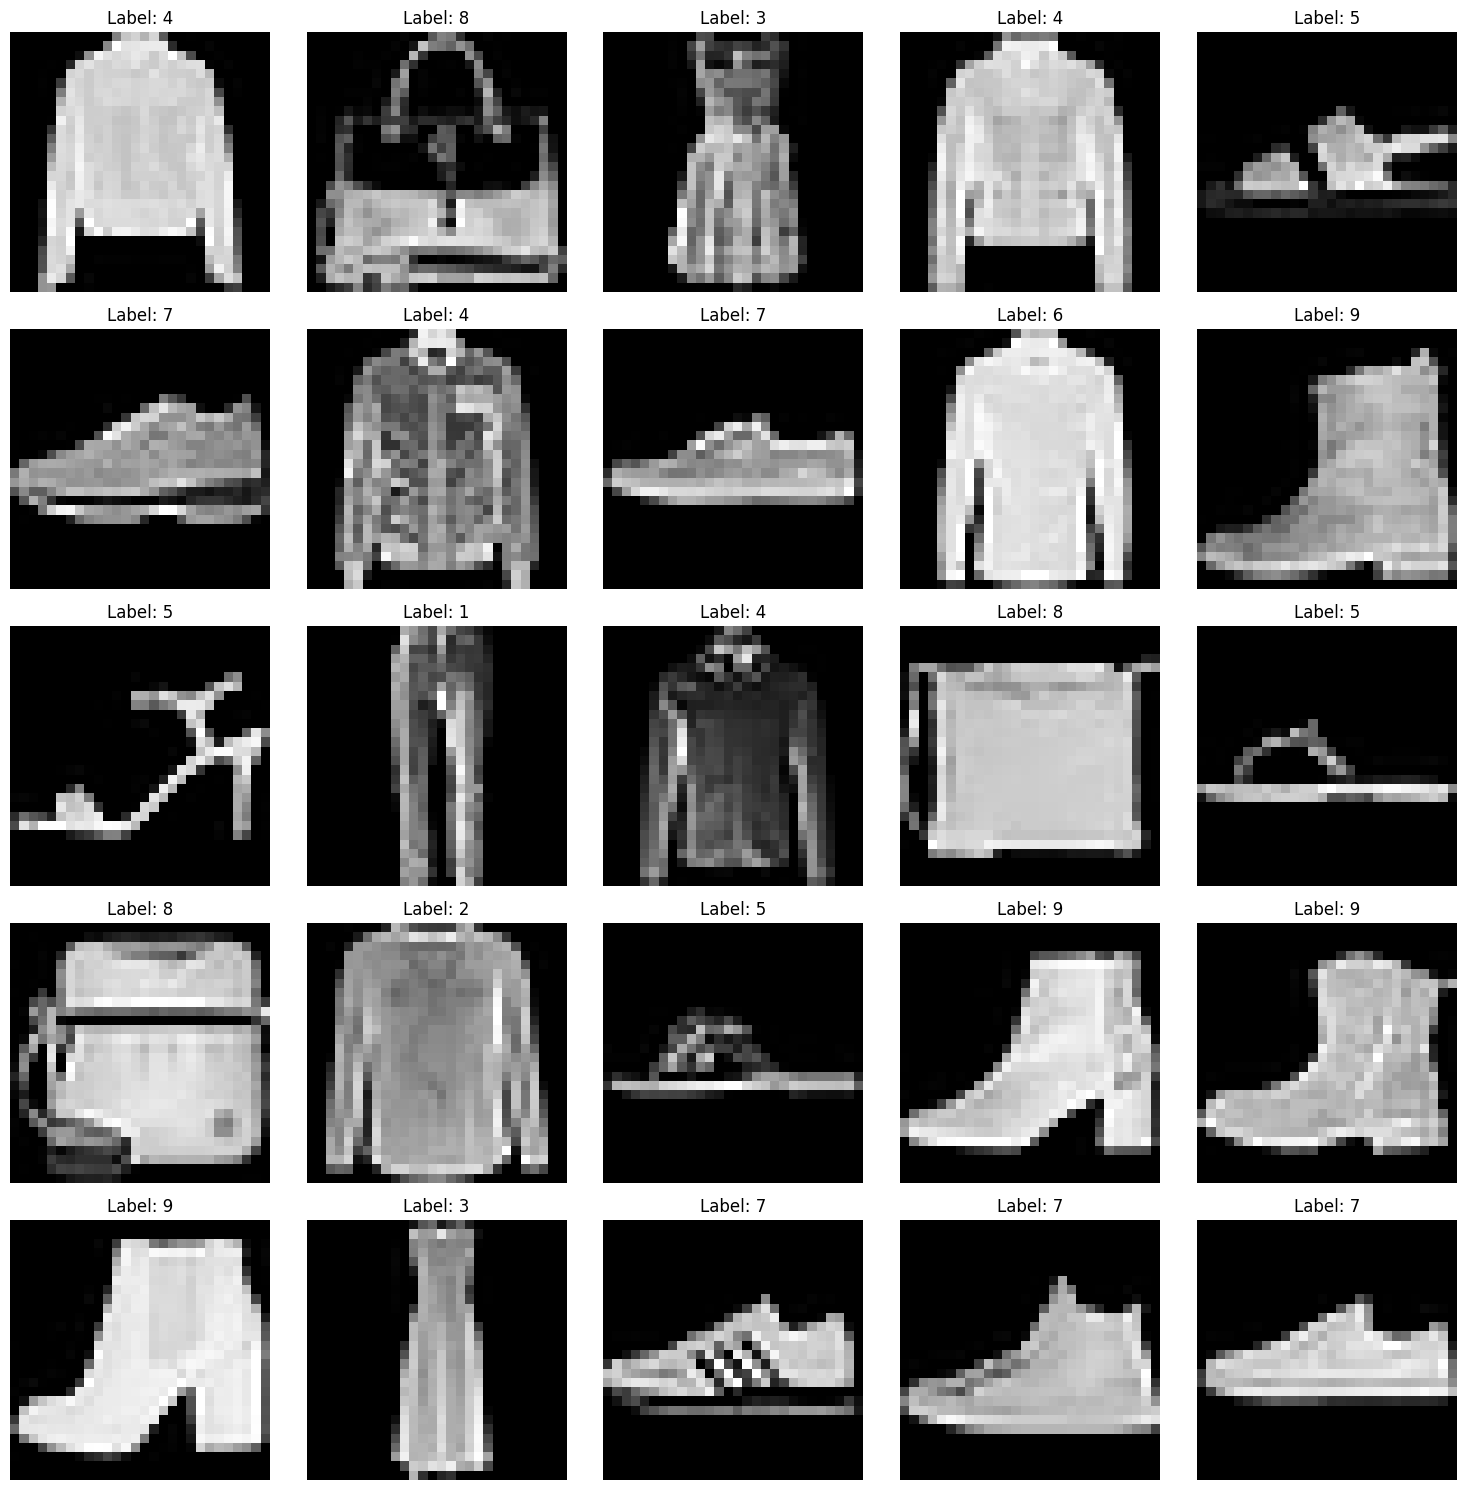

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train_data = pd.read_csv('fashion-mnist_train.csv')

random_indices = np.random.randint(0, len(train_data), 25)
images = train_data.iloc[random_indices, 1:].values
labels = train_data.iloc[random_indices, 0].values

plt.figure(figsize=(15, 15))

for idx, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(5, 5, idx + 1)
    img = image.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Class 0: T-shirt/top

Class 1: Trouser

Class 2: Pullover

Class 3: Dress

Class 4: Coat

Class 5: Sandal

Class 6: Shirt

Class 7: Sneaker

Class 8: Bag

Class 9: Ankle boot

### 4.2.2 Implement the CnnAutoencoder class 

In [ ]:
import torch
import torch.nn as nn

class CnnAutoencoder(nn.Module):
    def __init__(self):
        super(CnnAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64 * 4 * 4, 64 * 4 * 4),
            nn.ReLU(),
            nn.Unflatten(1, (64, 4, 4)),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        return self.encoder(x)

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)


### 4.2.3 Plots and Visualizations 

Epoch [1/10], Train Loss: 0.0454, Test Loss: 0.0190
Epoch [2/10], Train Loss: 0.0156, Test Loss: 0.0133
Epoch [3/10], Train Loss: 0.0119, Test Loss: 0.0109
Epoch [4/10], Train Loss: 0.0101, Test Loss: 0.0095
Epoch [5/10], Train Loss: 0.0090, Test Loss: 0.0086
Epoch [6/10], Train Loss: 0.0083, Test Loss: 0.0081
Epoch [7/10], Train Loss: 0.0078, Test Loss: 0.0077
Epoch [8/10], Train Loss: 0.0075, Test Loss: 0.0074
Epoch [9/10], Train Loss: 0.0072, Test Loss: 0.0071
Epoch [10/10], Train Loss: 0.0070, Test Loss: 0.0070


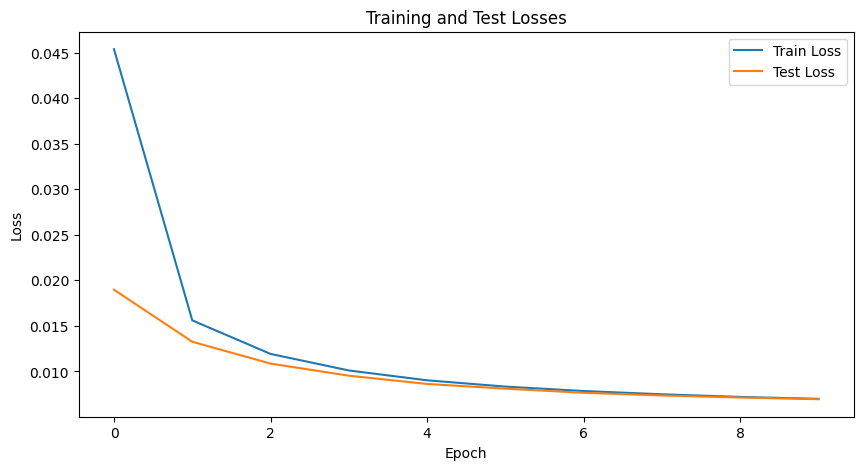

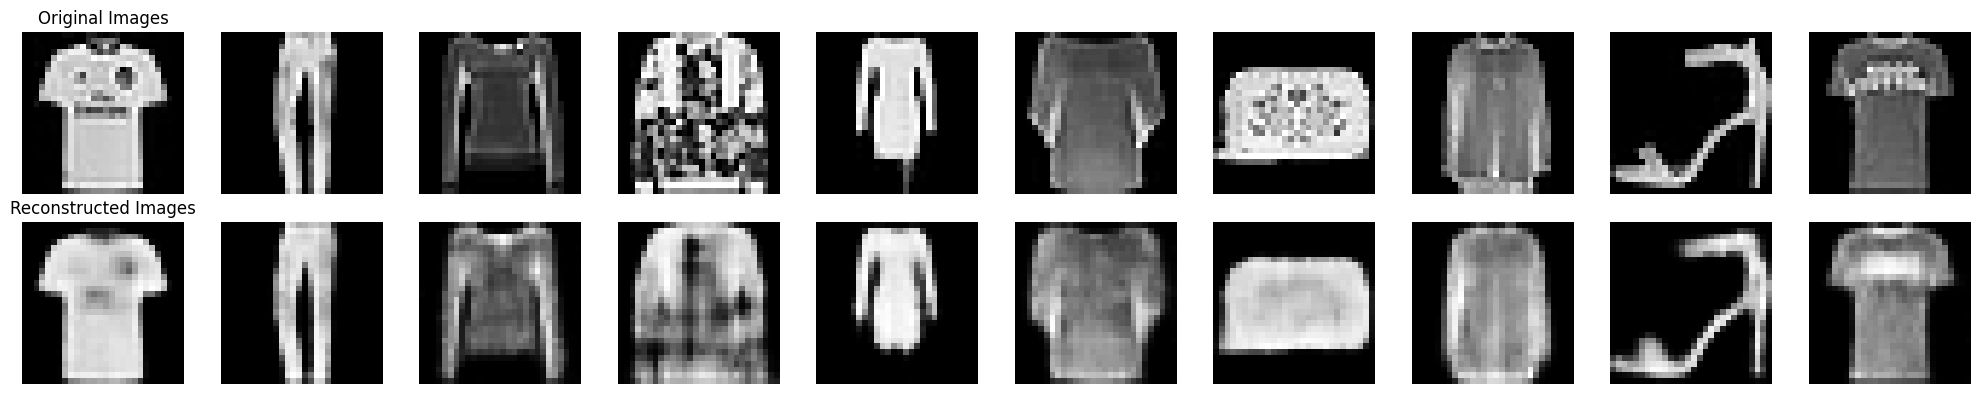

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from sklearn.model_selection import train_test_split

class FashionMNISTDataset(Dataset):
    def __init__(self, csv_file):
        data = pd.read_csv(csv_file)
        self.labels = data.iloc[:, 0].values
        self.images = data.iloc[:, 1:].values.astype('float32') / 255.0
        self.images = self.images.reshape(-1, 1, 28, 28)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = torch.FloatTensor(self.images[idx])
        label = self.labels[idx]
        return image, label

class CnnAutoencoder(nn.Module):
    def __init__(self):
        super(CnnAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        return self.encoder(x)

    def decode(self, x):
        return self.decoder(x)

    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

def train_model(model, train_loader, test_loader, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for data, _ in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, data)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for data, _ in test_loader:
                data = data.to(device)
                output = model(data)
                loss = criterion(output, data)
                test_loss += loss.item()

        train_loss = train_loss / len(train_loader)
        test_loss = test_loss / len(test_loader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    return train_losses, test_losses

def visualize_results(model, test_loader, num_images=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    with torch.no_grad():
        data, _ = next(iter(test_loader))
        data = data[:num_images].to(device)
        output = model(data)

        plt.figure(figsize=(20, 4))
        for i in range(num_images):
            # Original Images
            ax = plt.subplot(2, num_images, i + 1)
            plt.imshow(data[i].cpu().squeeze(), cmap='gray')
            plt.axis('off')
            if i == 0:
                ax.set_title('Original Images')

            # Reconstructed Images
            ax = plt.subplot(2, num_images, i + 1 + num_images)
            plt.imshow(output[i].cpu().squeeze(), cmap='gray')
            plt.axis('off')
            if i == 0:
                ax.set_title('Reconstructed Images')

        plt.tight_layout()
        plt.show()

def main():
    train_dataset = FashionMNISTDataset('fashion-mnist_train.csv')
    test_dataset = FashionMNISTDataset('fashion-mnist_test.csv')

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    model = CnnAutoencoder()
    train_losses, test_losses = train_model(model, train_loader, test_loader)

    # Plot training and test losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Losses')
    plt.legend()
    plt.show()

    # Visualize reconstructions
    visualize_results(model, test_loader)

if __name__ == "__main__":
    main()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

class CnnAutoencoder(nn.Module):
    def __init__(self):
        super(CnnAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        return self.encoder(x)

    def decode(self, x):
        return self.decoder(x)

    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    X = data.drop('label', axis=1).values / 255.0
    y = data['label'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = X_train.reshape(-1, 1, 28, 28)
    X_test = X_test.reshape(-1, 1, 28, 28)

    return torch.FloatTensor(X_train), torch.FloatTensor(X_test), y_train, y_test

def train_model(model, train_loader, num_epochs=50):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    losses = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch in train_loader:
            data = batch[0].to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')

    return losses

def visualize_reconstructions(model, test_loader, device):
    model.eval()
    with torch.no_grad():
        data = next(iter(test_loader))[0][:10].to(device)
        reconstructed = model(data)

        plt.figure(figsize=(20, 4))
        for i in range(10):
            plt.subplot(2, 10, i + 1)
            plt.imshow(data[i][0].cpu().numpy(), cmap='gray')
            plt.axis('off')

            plt.subplot(2, 10, i + 11)
            plt.imshow(reconstructed[i][0].cpu().numpy(), cmap='gray')
            plt.axis('off')
        plt.savefig('reconstructions.png')
        plt.close()

def visualize_latent_space(model, test_loader, y_test, device):
    model.eval()
    latent_vectors = []
    with torch.no_grad():
        for batch in test_loader:
            data = batch[0].to(device)
            latent = model.encode(data)
            latent_vectors.append(latent.view(latent.size(0), -1).cpu().numpy())

    latent_vectors = np.concatenate(latent_vectors)

    pca = PCA(n_components=3)
    latent_pca = pca.fit_transform(latent_vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=y_test, cmap='tab10')
    plt.colorbar()
    plt.title('2D PCA of Latent Space')
    plt.savefig('latent_space_2d.png')
    plt.close()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(latent_pca[:, 0], latent_pca[:, 1], latent_pca[:, 2],
                        c=y_test, cmap='tab10')
    plt.colorbar(scatter)
    plt.title('3D PCA of Latent Space')
    plt.savefig('latent_space_3d.png')
    plt.close()

def main():
    file_path = 'fashion-mnist_test.csv'

    X_train, X_test, y_train, y_test = load_and_preprocess_data(file_path)

    train_dataset = TensorDataset(X_train)
    test_dataset = TensorDataset(X_test)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = CnnAutoencoder().to(device)

    losses = train_model(model, train_loader)

    plt.plot(losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.savefig('training_loss.png')
    plt.close()

    visualize_reconstructions(model, test_loader, device)
    visualize_latent_space(model, test_loader, y_test, device)

if __name__ == "__main__":
    main()

Epoch [5/50], Loss: 0.023070
Epoch [10/50], Loss: 0.015908
Epoch [15/50], Loss: 0.012768
Epoch [20/50], Loss: 0.010887
Epoch [25/50], Loss: 0.009714
Epoch [30/50], Loss: 0.008878
Epoch [35/50], Loss: 0.008234
Epoch [40/50], Loss: 0.007756
Epoch [45/50], Loss: 0.007406
Epoch [50/50], Loss: 0.007084


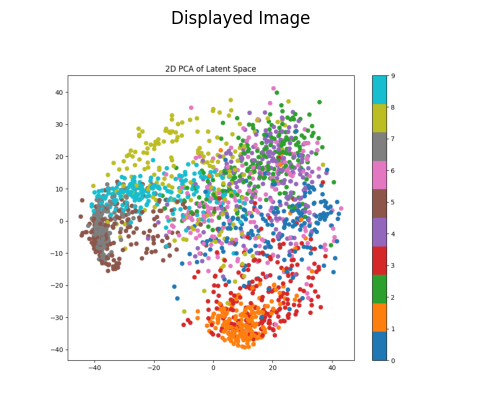

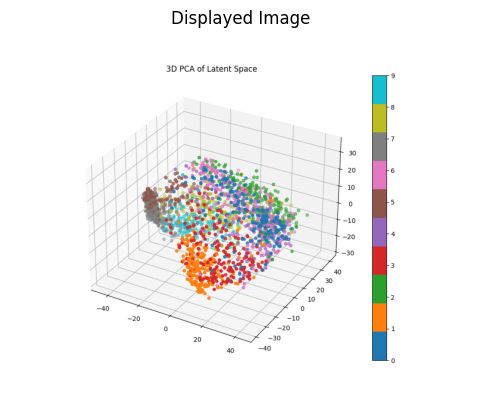

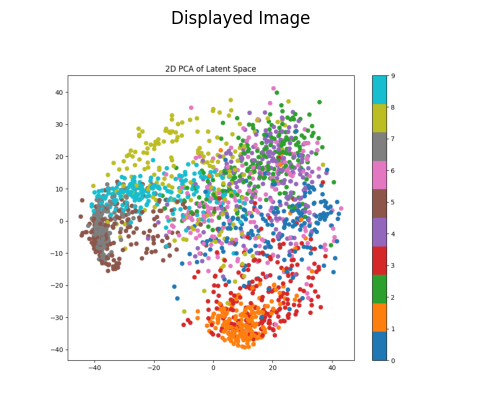

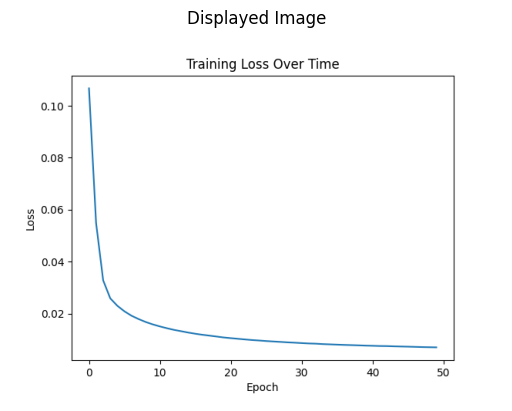

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

image_paths = [
    '/content/latent_space_2d.png',
    '/content/latent_space_3d.png',
    '/content/training_loss.png'
]

for image_path in image_paths:
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Displayed Image')
    plt.show()


### 4.2.4 Hyperparameter Tuning 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class CnnAutoencoder(nn.Module):
    def __init__(self, filters, kernel_sizes):
        super(CnnAutoencoder, self).__init__()

        def get_padding(kernel_size):
            return (kernel_size - 1) // 2

        self.encoder = nn.Sequential(
            nn.Conv2d(1, filters[0], kernel_sizes[0], stride=2, padding=get_padding(kernel_sizes[0])),
            nn.ReLU(),
            nn.Conv2d(filters[0], filters[1], kernel_sizes[1], stride=2, padding=get_padding(kernel_sizes[1])),
            nn.ReLU(),
            nn.Conv2d(filters[1], filters[2], kernel_sizes[2], padding=get_padding(kernel_sizes[2]))
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(filters[2], filters[1], kernel_sizes[2], padding=get_padding(kernel_sizes[2])),
            nn.ReLU(),
            nn.ConvTranspose2d(filters[1], filters[0], kernel_sizes[1], stride=2, padding=get_padding(kernel_sizes[1]), output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(filters[0], 1, kernel_sizes[0], stride=2, padding=get_padding(kernel_sizes[0]), output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def load_and_split_data(file_path):
    data = pd.read_csv(file_path)
    X = data.drop('label', axis=1).values / 255.0
    X = X.reshape(-1, 1, 28, 28)
    X = torch.FloatTensor(X)

    total_size = len(X)
    train_size = int(0.7 * total_size)
    val_size = int(0.15 * total_size)
    test_size = total_size - train_size - val_size

    train_data, val_data, test_data = random_split(X, [train_size, val_size, test_size])

    return train_data, val_data, test_data

def train_and_validate(model, train_loader, val_loader, optimizer, criterion, num_epochs, device):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch in train_loader:
            data = batch.to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                data = batch.to(device)
                outputs = model(data)
                loss = criterion(outputs, data)
                val_loss += loss.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

    return train_losses, val_losses

def experiment_hyperparameters():
    file_path = 'fashion-mnist_test.csv'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    train_data, val_data, test_data = load_and_split_data(file_path)

    hyperparameters = {
        'model1': {
            'filters': [16, 32, 64],
            'kernel_sizes': [3, 3, 3],
            'learning_rate': 0.001,
            'optimizer': optim.Adam,
            'batch_size': 128
        },
        'model2': {
            'filters': [32, 64, 128],
            'kernel_sizes': [3, 3, 3],
            'learning_rate': 0.0005,
            'optimizer': optim.RMSprop,
            'batch_size': 64
        },
        'model3': {
            'filters': [24, 48, 96],
            'kernel_sizes': [3, 3, 3],
            'learning_rate': 0.002,
            'optimizer': optim.SGD,
            'batch_size': 256
        }
    }

    results = {}

    for model_name, params in hyperparameters.items():
        print(f"\nTraining {model_name}")

        train_loader = DataLoader(train_data, batch_size=params['batch_size'], shuffle=True)
        val_loader = DataLoader(val_data, batch_size=params['batch_size'])

        model = CnnAutoencoder(params['filters'], params['kernel_sizes']).to(device)
        optimizer = params['optimizer'](model.parameters(), lr=params['learning_rate'])
        criterion = nn.MSELoss()

        train_losses, val_losses = train_and_validate(
            model, train_loader, val_loader, optimizer, criterion, num_epochs=50, device=device
        )

        results[model_name] = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'final_val_loss': val_losses[-1],
            'params': params
        }

        torch.save(model.state_dict(), f'{model_name}_weights.pth')

    plt.figure(figsize=(15, 5))
    for model_name, data in results.items():
        plt.subplot(1, 3, int(model_name[-1]))
        plt.plot(data['train_losses'], label='Train Loss')
        plt.plot(data['val_losses'], label='Validation Loss')
        plt.title(f'{model_name} Learning Curves\nFinal Val Loss: {data["final_val_loss"]:.6f}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

    plt.tight_layout()
    plt.savefig('hyperparameter_comparison.png')
    plt.close()

    best_model = min(results.items(), key=lambda x: x[1]['final_val_loss'])
    print(f"\nBest performing model: {best_model[0]}")
    print("Parameters:")
    for key, value in best_model[1]['params'].items():
        if key == 'optimizer':
            print(f"{key}: {value.__name__}")
        else:
            print(f"{key}: {value}")

def main():
    experiment_hyperparameters()

if __name__ == "__main__":
    main()


Training model1
Epoch [5/50], Train Loss: 0.010523, Val Loss: 0.009975
Epoch [10/50], Train Loss: 0.006038, Val Loss: 0.005834
Epoch [15/50], Train Loss: 0.004369, Val Loss: 0.004282
Epoch [20/50], Train Loss: 0.003605, Val Loss: 0.003545
Epoch [25/50], Train Loss: 0.003062, Val Loss: 0.002990
Epoch [30/50], Train Loss: 0.002677, Val Loss: 0.002698
Epoch [35/50], Train Loss: 0.002425, Val Loss: 0.002401
Epoch [40/50], Train Loss: 0.002202, Val Loss: 0.002204
Epoch [45/50], Train Loss: 0.002034, Val Loss: 0.002014
Epoch [50/50], Train Loss: 0.001863, Val Loss: 0.001939

Training model2
Epoch [5/50], Train Loss: 0.007166, Val Loss: 0.007677
Epoch [10/50], Train Loss: 0.004006, Val Loss: 0.004000
Epoch [15/50], Train Loss: 0.002896, Val Loss: 0.002823
Epoch [20/50], Train Loss: 0.002518, Val Loss: 0.002167
Epoch [25/50], Train Loss: 0.002208, Val Loss: 0.001677
Epoch [30/50], Train Loss: 0.001723, Val Loss: 0.001569
Epoch [35/50], Train Loss: 0.001441, Val Loss: 0.001380
Epoch [40/50], T

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class ShallowAutoencoder(nn.Module):
    def __init__(self, latent_dim=64):
        super(ShallowAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, latent_dim, 3, stride=2, padding=1),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

class MediumAutoencoder(nn.Module):
    def __init__(self, latent_dim=64):
        super(MediumAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, latent_dim, 3, stride=2, padding=1),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

class DeepAutoencoder(nn.Module):
    def __init__(self, latent_dim=64):
        super(DeepAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, latent_dim, 3, stride=2, padding=1),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 128, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def load_and_split_data(file_path):
    data = pd.read_csv(file_path)
    X = data.drop('label', axis=1).values / 255.0
    X = X.reshape(-1, 1, 28, 28)
    X = torch.FloatTensor(X)

    total_size = len(X)
    train_size = int(0.7 * total_size)
    val_size = int(0.15 * total_size)
    test_size = total_size - train_size - val_size

    train_data, val_data, test_data = random_split(X, [train_size, val_size, test_size])

    return train_data, val_data, test_data

def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch in train_loader:
            data = batch.to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                data = batch.to(device)
                outputs = model(data)
                loss = criterion(outputs, data)
                val_loss += loss.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

    return train_losses, val_losses

def experiment_depth():
    file_path = 'fashion-mnist_test.csv'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    batch_size = 128
    latent_dim = 64
    learning_rate = 0.001
    num_epochs = 50

    train_data, val_data, test_data = load_and_split_data(file_path)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size)

    models = {
        'Shallow (2 layers)': ShallowAutoencoder(latent_dim),
        'Medium (3 layers)': MediumAutoencoder(latent_dim),
        'Deep (4 layers)': DeepAutoencoder(latent_dim)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}")
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        criterion = nn.MSELoss()

        train_losses, val_losses = train_and_validate(
            model, train_loader, val_loader, criterion, optimizer, num_epochs, device
        )

        results[name] = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'final_val_loss': val_losses[-1]
        }

        torch.save(model.state_dict(), f'autoencoder_{name.split()[0].lower()}.pth')

    plt.figure(figsize=(15, 5))
    for i, (name, data) in enumerate(results.items(), 1):
        plt.subplot(1, 3, i)
        plt.plot(data['train_losses'], label='Train Loss')
        plt.plot(data['val_losses'], label='Validation Loss')
        plt.title(f'{name}\nFinal Val Loss: {data["final_val_loss"]:.6f}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

    plt.tight_layout()
    plt.savefig('depth_comparison.png')
    plt.close()

    best_model = min(results.items(), key=lambda x: x[1]['final_val_loss'])
    print(f"\nBest performing model: {best_model[0]}")
    print(f"Final validation loss: {best_model[1]['final_val_loss']:.6f}")

def main():
    experiment_depth()

if __name__ == "__main__":
    main()


Training Shallow (2 layers)
Epoch [5/50], Train Loss: 0.004240, Val Loss: 0.003924
Epoch [10/50], Train Loss: 0.002063, Val Loss: 0.002026
Epoch [15/50], Train Loss: 0.001484, Val Loss: 0.001540
Epoch [20/50], Train Loss: 0.001129, Val Loss: 0.001125
Epoch [25/50], Train Loss: 0.000945, Val Loss: 0.000964
Epoch [30/50], Train Loss: 0.000829, Val Loss: 0.000826
Epoch [35/50], Train Loss: 0.000721, Val Loss: 0.000739
Epoch [40/50], Train Loss: 0.000643, Val Loss: 0.000642
Epoch [45/50], Train Loss: 0.000598, Val Loss: 0.000593
Epoch [50/50], Train Loss: 0.000548, Val Loss: 0.000540

Training Medium (3 layers)
Epoch [5/50], Train Loss: 0.006120, Val Loss: 0.005513
Epoch [10/50], Train Loss: 0.002911, Val Loss: 0.002806
Epoch [15/50], Train Loss: 0.002059, Val Loss: 0.001983
Epoch [20/50], Train Loss: 0.001546, Val Loss: 0.001536
Epoch [25/50], Train Loss: 0.001287, Val Loss: 0.001343
Epoch [30/50], Train Loss: 0.001059, Val Loss: 0.001455
Epoch [35/50], Train Loss: 0.000955, Val Loss: 0.

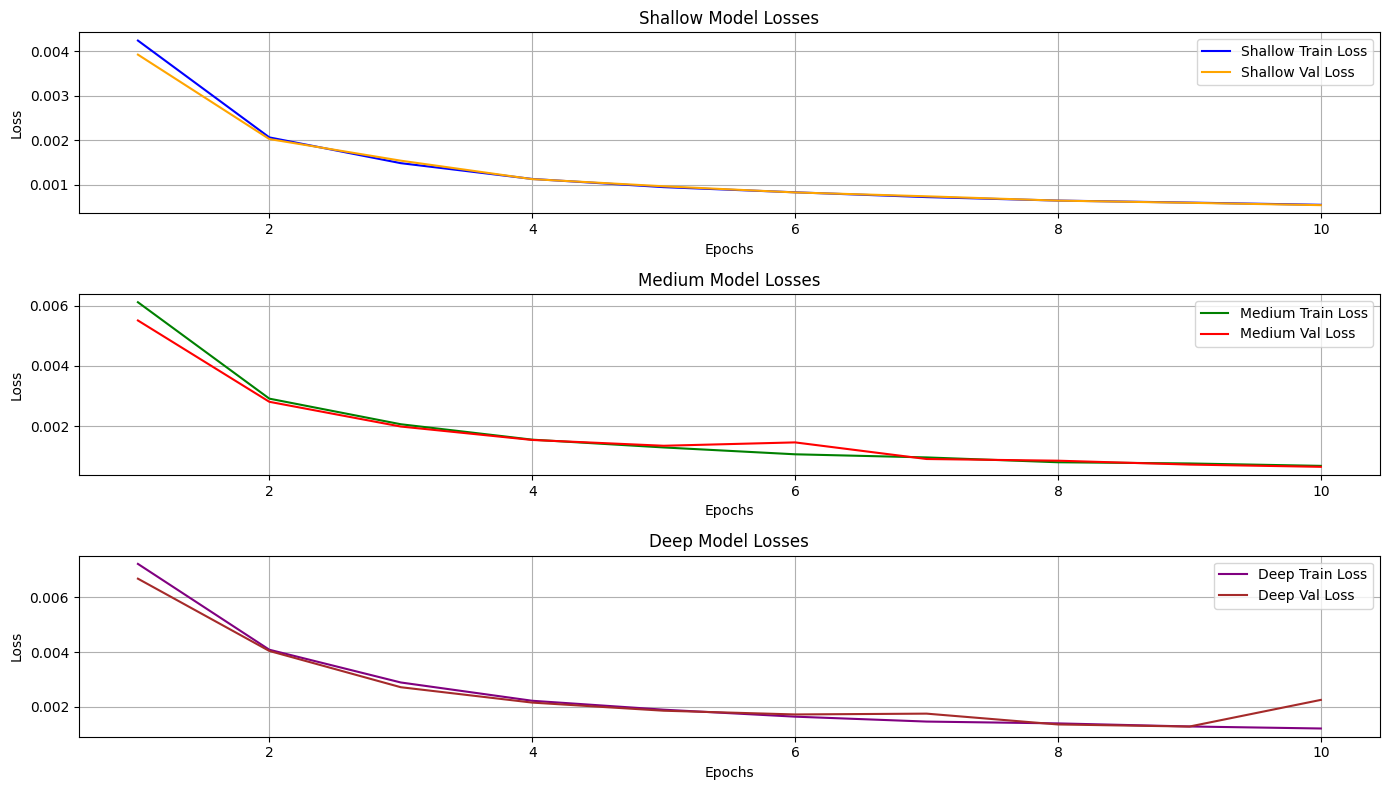

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))

shallow_train_loss = [
    0.004240, 0.002063, 0.001484, 0.001129, 0.000945,
    0.000829, 0.000721, 0.000643, 0.000598, 0.000548
]

shallow_val_loss = [
    0.003924, 0.002026, 0.001540, 0.001125, 0.000964,
    0.000826, 0.000739, 0.000642, 0.000593, 0.000540
]

medium_train_loss = [
    0.006120, 0.002911, 0.002059, 0.001546, 0.001287,
    0.001059, 0.000955, 0.000794, 0.000754, 0.000674
]

medium_val_loss = [
    0.005513, 0.002806, 0.001983, 0.001536, 0.001343,
    0.001455, 0.000902, 0.000846, 0.000717, 0.000642
]

deep_train_loss = [
    0.007232, 0.004083, 0.002882, 0.002211, 0.001884,
    0.001628, 0.001448, 0.001381, 0.001268, 0.001194
]

deep_val_loss = [
    0.006690, 0.004038, 0.002708, 0.002144, 0.001846,
    0.001709, 0.001739, 0.001342, 0.001265, 0.002243
]

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(epochs, shallow_train_loss, label='Shallow Train Loss', color='blue')
plt.plot(epochs, shallow_val_loss, label='Shallow Val Loss', color='orange')
plt.title('Shallow Model Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(epochs, medium_train_loss, label='Medium Train Loss', color='green')
plt.plot(epochs, medium_val_loss, label='Medium Val Loss', color='red')
plt.title('Medium Model Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(epochs, deep_train_loss, label='Deep Train Loss', color='purple')
plt.plot(epochs, deep_val_loss, label='Deep Val Loss', color='brown')
plt.title('Deep Model Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class CnnAutoencoder(nn.Module):
    def __init__(self, filters, kernel_sizes):
        super(CnnAutoencoder, self).__init__()

        def get_padding(kernel_size):
            return (kernel_size - 1) // 2

        self.encoder = nn.Sequential(
            nn.Conv2d(1, filters[0], kernel_sizes[0], stride=2, padding=get_padding(kernel_sizes[0])),
            nn.ReLU(),
            nn.Conv2d(filters[0], filters[1], kernel_sizes[1], stride=2, padding=get_padding(kernel_sizes[1])),
            nn.ReLU(),
            nn.Conv2d(filters[1], filters[2], kernel_sizes[2], padding=get_padding(kernel_sizes[2]))
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(filters[2], filters[1], kernel_sizes[2], padding=get_padding(kernel_sizes[2])),
            nn.ReLU(),
            nn.ConvTranspose2d(filters[1], filters[0], kernel_sizes[1], stride=2, padding=get_padding(kernel_sizes[1]), output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(filters[0], 1, kernel_sizes[0], stride=2, padding=get_padding(kernel_sizes[0]), output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def load_and_split_data(file_path):
    data = pd.read_csv(file_path)
    X = data.drop('label', axis=1).values / 255.0
    X = X.reshape(-1, 1, 28, 28)
    X = torch.FloatTensor(X)

    total_size = len(X)
    train_size = int(0.7 * total_size)
    val_size = int(0.15 * total_size)
    test_size = total_size - train_size - val_size

    train_data, val_data, test_data = random_split(X, [train_size, val_size, test_size])

    return train_data, val_data, test_data

def train_and_validate(model, train_loader, val_loader, optimizer, criterion, num_epochs, device):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch in train_loader:
            data = batch.to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                data = batch.to(device)
                outputs = model(data)
                loss = criterion(outputs, data)
                val_loss += loss.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

    return train_losses, val_losses

def experiment_hyperparameters():
    file_path = 'fashion-mnist_test.csv'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    train_data, val_data, test_data = load_and_split_data(file_path)

    hyperparameters = {
        'model1': {
            'filters': [16, 32, 64],
            'kernel_sizes': [3, 3, 3],
            'learning_rate': 0.001,
            'optimizer': optim.Adam,
            'batch_size': 128
        },
        'model2': {
            'filters': [32, 64, 128],
            'kernel_sizes': [3, 3, 3],
            'learning_rate': 0.0005,
            'optimizer': optim.RMSprop,
            'batch_size': 64
        },
        'model3': {
            'filters': [24, 48, 96],
            'kernel_sizes': [3, 3, 3],
            'learning_rate': 0.002,
            'optimizer': optim.SGD,
            'batch_size': 256
        }
    }

    results = {}

    for model_name, params in hyperparameters.items():
        print(f"\nTraining {model_name}")

        train_loader = DataLoader(train_data, batch_size=params['batch_size'], shuffle=True)
        val_loader = DataLoader(val_data, batch_size=params['batch_size'])

        model = CnnAutoencoder(params['filters'], params['kernel_sizes']).to(device)
        optimizer = params['optimizer'](model.parameters(), lr=params['learning_rate'])
        criterion = nn.MSELoss()

        train_losses, val_losses = train_and_validate(
            model, train_loader, val_loader, optimizer, criterion, num_epochs=50, device=device
        )

        results[model_name] = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'final_val_loss': val_losses[-1],
            'params': params
        }

        torch.save(model.state_dict(), f'{model_name}_weights.pth')

    plt.figure(figsize=(15, 5))
    for model_name, data in results.items():
        plt.subplot(1, 3, int(model_name[-1]))
        plt.plot(data['train_losses'], label='Train Loss')
        plt.plot(data['val_losses'], label='Validation Loss')
        plt.title(f'{model_name} Learning Curves\nFinal Val Loss: {data["final_val_loss"]:.6f}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

    plt.tight_layout()
    plt.savefig('hyperparameter_comparison.png')
    plt.close()

    best_model = min(results.items(), key=lambda x: x[1]['final_val_loss'])
    print(f"\nBest performing model: {best_model[0]}")
    print("Parameters:")
    for key, value in best_model[1]['params'].items():
        if key == 'optimizer':
            print(f"{key}: {value.__name__}")
        else:
            print(f"{key}: {value}")

def main():
    experiment_hyperparameters()

if __name__ == "__main__":
    main()



Training model1
Epoch [5/50], Train Loss: 0.012845, Val Loss: 0.012070
Epoch [10/50], Train Loss: 0.008693, Val Loss: 0.008524
Epoch [15/50], Train Loss: 0.006806, Val Loss: 0.006745
Epoch [20/50], Train Loss: 0.005487, Val Loss: 0.005439
Epoch [25/50], Train Loss: 0.004539, Val Loss: 0.004630
Epoch [30/50], Train Loss: 0.003882, Val Loss: 0.003895
Epoch [35/50], Train Loss: 0.003419, Val Loss: 0.003460
Epoch [40/50], Train Loss: 0.003205, Val Loss: 0.003158
Epoch [45/50], Train Loss: 0.002831, Val Loss: 0.002883
Epoch [50/50], Train Loss: 0.002622, Val Loss: 0.002659

Training model2
Epoch [5/50], Train Loss: 0.007547, Val Loss: 0.006519
Epoch [10/50], Train Loss: 0.004477, Val Loss: 0.005133
Epoch [15/50], Train Loss: 0.003226, Val Loss: 0.005142
Epoch [20/50], Train Loss: 0.002502, Val Loss: 0.002415
Epoch [25/50], Train Loss: 0.002226, Val Loss: 0.002286
Epoch [30/50], Train Loss: 0.001802, Val Loss: 0.002131
Epoch [35/50], Train Loss: 0.001570, Val Loss: 0.001469
Epoch [40/50], T

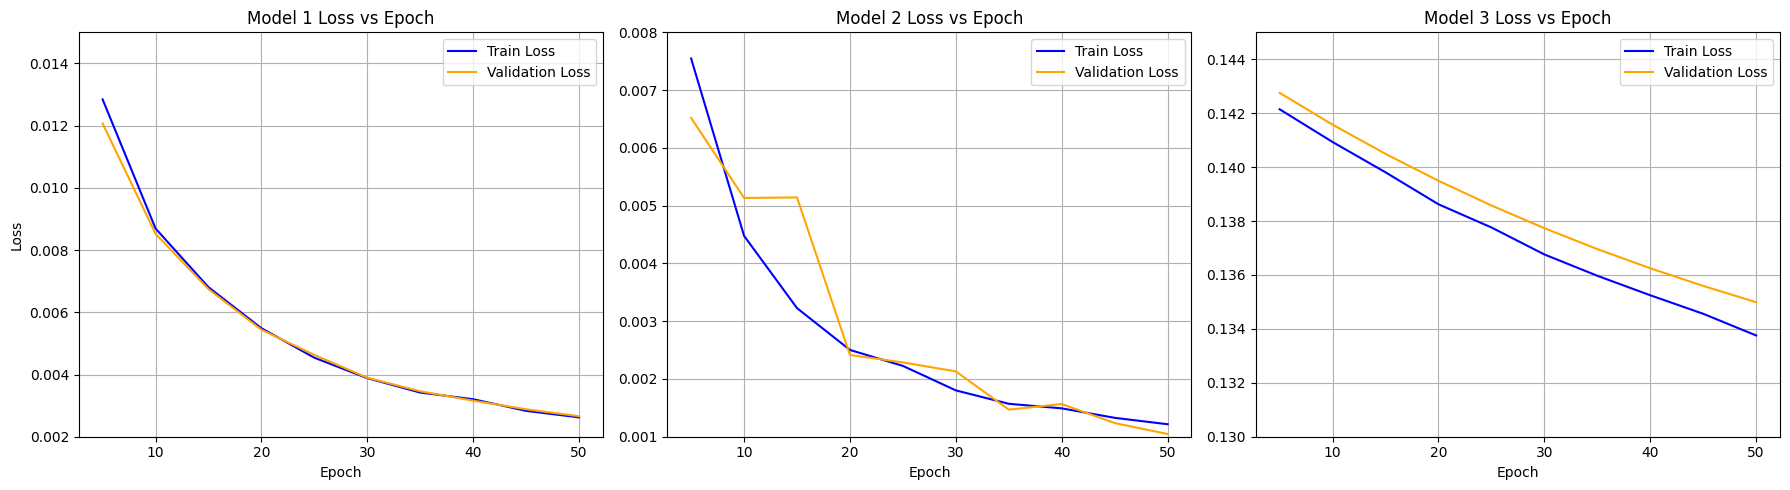

In [ ]:
import matplotlib.pyplot as plt

train_losses_model1 = [0.012845, 0.008693, 0.006806, 0.005487, 0.004539, 0.003882, 0.003419, 0.003205, 0.002831, 0.002622]
val_losses_model1 = [0.012070, 0.008524, 0.006745, 0.005439, 0.004630, 0.003895, 0.003460, 0.003158, 0.002883, 0.002659]

train_losses_model2 = [0.007547, 0.004477, 0.003226, 0.002502, 0.002226, 0.001802, 0.001570, 0.001491, 0.001327, 0.001216]
val_losses_model2 = [0.006519, 0.005133, 0.005142, 0.002415, 0.002286, 0.002131, 0.001469, 0.001566, 0.001237, 0.001047]

train_losses_model3 = [0.142146, 0.140932, 0.139807, 0.138622, 0.137762, 0.136761, 0.135970, 0.135247, 0.134560, 0.133756]
val_losses_model3 = [0.142755, 0.141575, 0.140491, 0.139493, 0.138577, 0.137735, 0.136960, 0.136248, 0.135594, 0.134988]

epochs = list(range(5, 51, 5))

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

axes[0].plot(epochs, train_losses_model1, label='Train Loss', color='blue')
axes[0].plot(epochs, val_losses_model1, label='Validation Loss', color='orange')
axes[0].set_title('Model 1 Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(0.002, 0.015)

axes[1].plot(epochs, train_losses_model2, label='Train Loss', color='blue')
axes[1].plot(epochs, val_losses_model2, label='Validation Loss', color='orange')
axes[1].set_title('Model 2 Loss vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(0.001, 0.008)

axes[2].plot(epochs, train_losses_model3, label='Train Loss', color='blue')
axes[2].plot(epochs, val_losses_model3, label='Validation Loss', color='orange')
axes[2].set_title('Model 3 Loss vs Epoch')
axes[2].set_xlabel('Epoch')
axes[2].legend()
axes[2].grid(True)
axes[2].set_ylim(0.13, 0.145)

plt.tight_layout()
plt.show()


## 4.3 MLP Autoencoder 

Using device: cuda
Epoch [5/50], Train Loss: 0.6081, Val Loss: 0.5849
Epoch [10/50], Train Loss: 0.5966, Val Loss: 0.5756
Epoch [15/50], Train Loss: 0.5915, Val Loss: 0.5717
Epoch [20/50], Train Loss: 0.5884, Val Loss: 0.5694
Epoch [25/50], Train Loss: 0.5863, Val Loss: 0.5676
Epoch [30/50], Train Loss: 0.5848, Val Loss: 0.5662
Epoch [35/50], Train Loss: 0.5835, Val Loss: 0.5650
Epoch [40/50], Train Loss: 0.5825, Val Loss: 0.5643
Epoch [45/50], Train Loss: 0.5817, Val Loss: 0.5639
Epoch [50/50], Train Loss: 0.5810, Val Loss: 0.5632


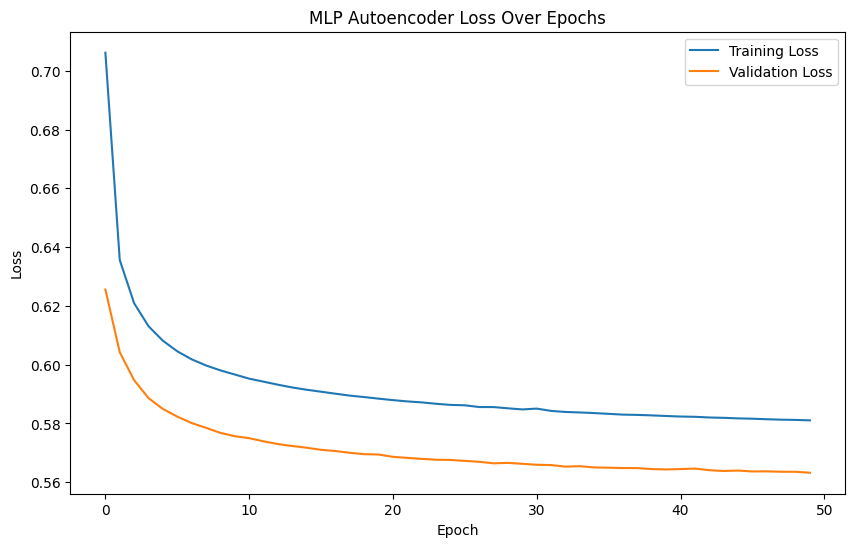

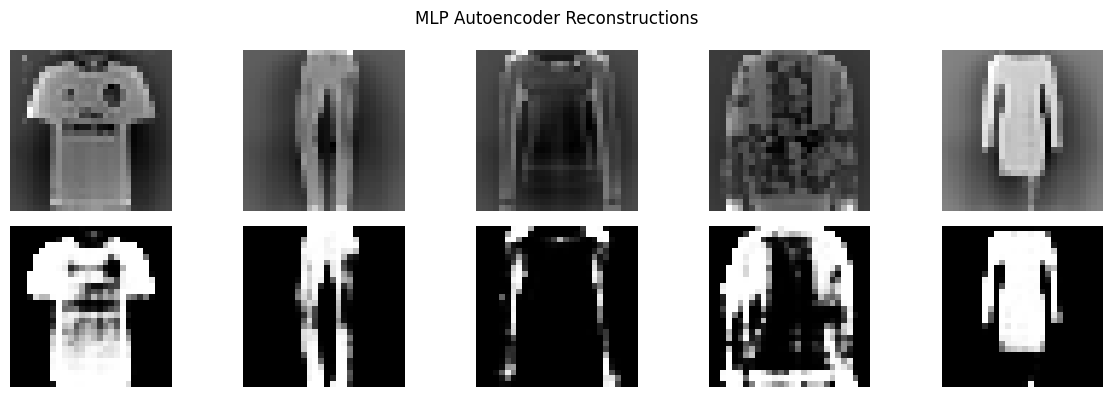


Test Set Reconstruction Error (MSE): 0.597509


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MLPAutoencoder(nn.Module):
    def __init__(self, input_size=784, hidden_size=256):
        super(MLPAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size // 2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, device='cuda'):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for data in train_loader:
            inputs = data[0].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_train_loss = running_loss / len(train_loader)
        train_losses.append(epoch_train_loss)

        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for data in val_loader:
                inputs = data[0].to(device)
                outputs = model(inputs)
                val_loss = criterion(outputs, inputs)
                running_val_loss += val_loss.item()
        epoch_val_loss = running_val_loss / len(val_loader)
        val_losses.append(epoch_val_loss)

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    return train_losses, val_losses

def plot_loss_curves(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('MLP Autoencoder Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def visualize_reconstructions(model, X_test, device, n_samples=5):
    model.eval()
    with torch.no_grad():
        test_tensor = torch.FloatTensor(X_test[:n_samples]).to(device)
        reconstructed = model(test_tensor).cpu().numpy()
    plt.figure(figsize=(12, 4))
    for i in range(n_samples):
        plt.subplot(2, n_samples, i + 1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.subplot(2, n_samples, n_samples + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle('MLP Autoencoder Reconstructions')
    plt.tight_layout()
    plt.show()

def main():
    torch.manual_seed(42)
    np.random.seed(42)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    X_train = train_df.iloc[:, 1:].values / 255.0
    X_test = test_df.iloc[:, 1:].values / 255.0
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_final, X_val = train_test_split(X_train_scaled, test_size=0.2, random_state=42)
    train_tensor = torch.FloatTensor(X_train_final)
    val_tensor = torch.FloatTensor(X_val)
    train_dataset = TensorDataset(train_tensor)
    val_dataset = TensorDataset(val_tensor)
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
    model = MLPAutoencoder().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, device=device)
    plot_loss_curves(train_losses, val_losses)
    visualize_reconstructions(model, X_test_scaled, device)
    model.eval()
    with torch.no_grad():
        test_tensor = torch.FloatTensor(X_test_scaled).to(device)
        reconstructed = model(test_tensor).cpu().numpy()
        test_mse = np.mean((X_test_scaled - reconstructed) ** 2)
        print(f"\nTest Set Reconstruction Error (MSE): {test_mse:.6f}")

if __name__ == "__main__":
    main()


Epoch [1/50], Loss: 0.8287, Val Loss: 0.7522
Epoch [11/50], Loss: 0.6516, Val Loss: 0.6563
Epoch [21/50], Loss: 0.6177, Val Loss: 0.6457
Epoch [31/50], Loss: 0.6026, Val Loss: 0.6448
Epoch [41/50], Loss: 0.5906, Val Loss: 0.6464


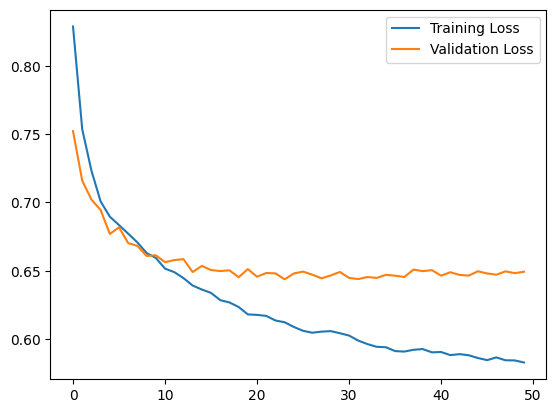

Test MSE: 0.7188577627398779


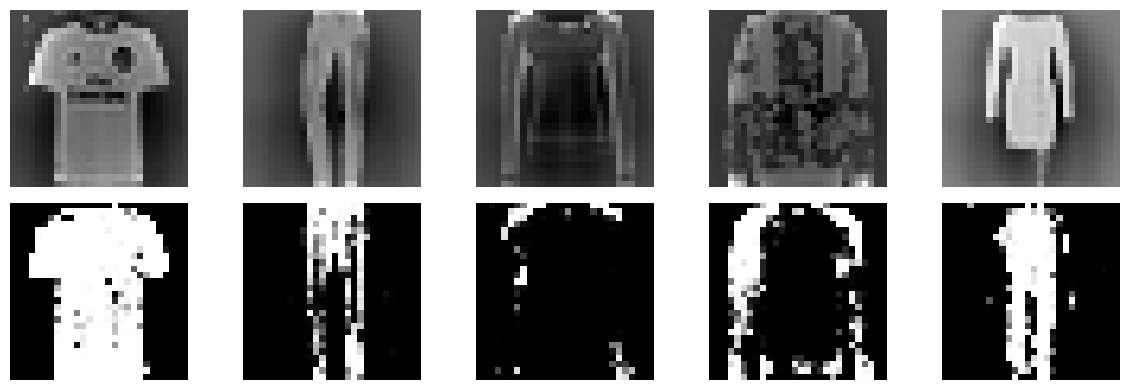

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class SimpleAutoencoder(nn.Module):
    def __init__(self):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def train_model(model, train_loader, val_loader):
    train_losses = []
    val_losses = []
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(50):
        model.train()
        total_loss = 0
        for data in train_loader:
            inputs = data[0].to('cpu')
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_losses.append(total_loss / len(train_loader))

        model.eval()
        val_loss = 0
        for data in val_loader:
            inputs = data[0].to('cpu')
            outputs = model(inputs)
            val_loss += criterion(outputs, inputs).item()
        val_losses.append(val_loss / len(val_loader))

        if epoch % 10 == 0:
            print(f'Epoch [{epoch + 1}/50], Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

    return train_losses, val_losses

def plot_losses(train_losses, val_losses):
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.legend()
    plt.show()

def visualize_reconstructions(model, X_test, n_samples=5):
    model.eval()
    test_tensor = torch.FloatTensor(X_test[:n_samples]).to('cpu')
    reconstructed = model(test_tensor).detach().numpy()
    plt.figure(figsize=(12, 4))
    for i in range(n_samples):
        plt.subplot(2, n_samples, i + 1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.subplot(2, n_samples, n_samples + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')

    X_train = train_df.iloc[:, 1:].values / 255.0
    X_test = test_df.iloc[:, 1:].values / 255.0

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_split, X_val = train_test_split(X_train_scaled, test_size=0.2)

    train_tensor = torch.FloatTensor(X_train_split)
    val_tensor = torch.FloatTensor(X_val)

    train_loader = DataLoader(train_tensor, batch_size=128)
    val_loader = DataLoader(val_tensor, batch_size=128)

    model = SimpleAutoencoder().to('cpu')
    train_losses, val_losses = train_model(model, train_loader, val_loader)
    plot_losses(train_losses, val_losses)

    test_tensor = torch.FloatTensor(X_test_scaled).to('cpu')
    reconstructed = model(test_tensor).detach().numpy()
    test_mse = np.mean((X_test_scaled - reconstructed) ** 2)
    print(f"Test MSE: {test_mse}")

    visualize_reconstructions(model, X_test_scaled)

if __name__ == "__main__":
    main()


## 4.4 PCA Autoencoder 

### 4.4.1 Implement the PcaAutoencoder Class 

In [ ]:
import numpy as np

class PcaAutoencoder:
    def __init__(self, n_components):
        self.n_components = n_components
        self.eigenvectors = None
        self.eigenvalues = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(covariance_matrix)
        idx = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[idx][:self.n_components]
        self.eigenvectors = self.eigenvectors[:, idx][:, :self.n_components]

    def encode(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.eigenvectors)

    def forward(self, Z):
        return np.dot(Z, self.eigenvectors.T) + self.mean


### 4.4.2 Estimate optimal number of components

Components: 5, Reconstruction Error: 0.491025
Components: 10, Reconstruction Error: 0.382354
Components: 15, Reconstruction Error: 0.337756
Components: 20, Reconstruction Error: 0.305866
Components: 25, Reconstruction Error: 0.283082
Components: 30, Reconstruction Error: 0.263975
Components: 35, Reconstruction Error: 0.247058
Components: 40, Reconstruction Error: 0.232106
Components: 45, Reconstruction Error: 0.219342
Components: 50, Reconstruction Error: 0.207886
Components: 55, Reconstruction Error: 0.197902
Components: 60, Reconstruction Error: 0.187838
Components: 65, Reconstruction Error: 0.178977
Components: 70, Reconstruction Error: 0.171321
Components: 75, Reconstruction Error: 0.163876
Components: 80, Reconstruction Error: 0.155866
Components: 85, Reconstruction Error: 0.148022
Components: 90, Reconstruction Error: 0.142131
Components: 95, Reconstruction Error: 0.136293
Components: 100, Reconstruction Error: 0.131138


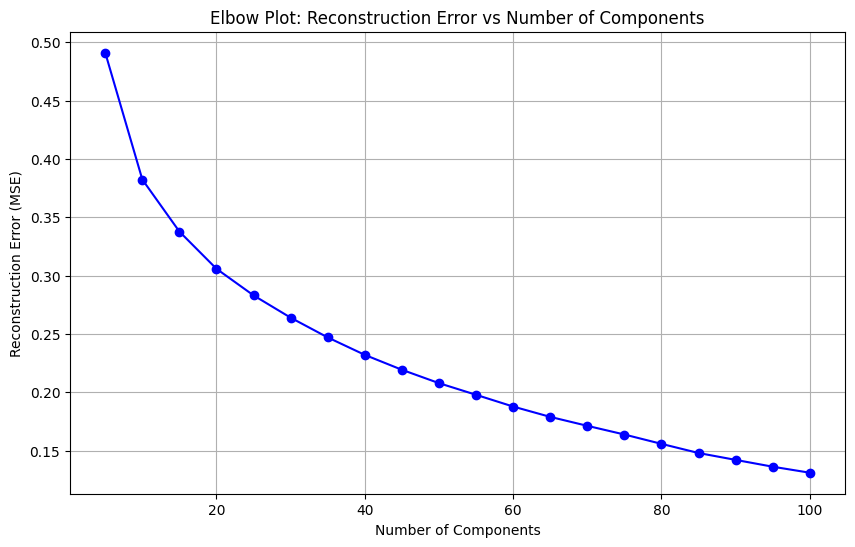


Optimal number of components: 15
Final reconstruction error with 15 components: 0.337756


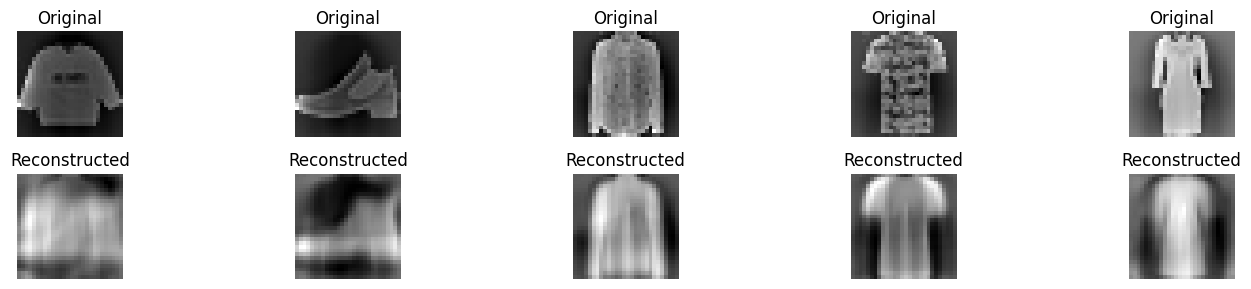

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class PcaAutoencoder:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        self.explained_variance_ = None
        self.singular_values_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        cov_matrix = np.cov(X_centered.T)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        self.components_ = eigenvectors[:, :self.n_components]
        self.explained_variance_ = eigenvalues[:self.n_components]
        self.singular_values_ = np.sqrt(eigenvalues[:self.n_components])
        return self

    def encode(self, X):
        X_centered = X - self.mean_
        X_transformed = np.dot(X_centered, self.components_)
        return X_transformed

    def forward(self, X):
        X_transformed = self.encode(X)
        X_reconstructed = np.dot(X_transformed, self.components_.T) + self.mean_
        return X_reconstructed

    def reconstruction_error(self, X):
        X_reconstructed = self.forward(X)
        return np.mean((X - X_reconstructed) ** 2)

def find_optimal_components(X_train, X_val, max_components=100, step=5):
    components_range = range(step, max_components + 1, step)
    errors = []

    for n_components in components_range:
        pca = PcaAutoencoder(n_components=n_components)
        pca.fit(X_train)
        error = pca.reconstruction_error(X_val)
        errors.append(error)
        print(f"Components: {n_components}, Reconstruction Error: {error:.6f}")

    plt.figure(figsize=(10, 6))
    plt.plot(components_range, errors, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error (MSE)')
    plt.title('Elbow Plot: Reconstruction Error vs Number of Components')
    plt.grid(True)
    plt.show()

    errors = np.array(errors)
    diffs = np.diff(errors, 2)
    k_optimal = components_range[np.argmax(diffs) + 2]

    return k_optimal, errors

def main():
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    X_train = train_df.iloc[:, 1:].values / 255.0
    X_test = test_df.iloc[:, 1:].values / 255.0
    val_size = 10000
    X_val = X_train[:val_size]
    X_train = X_train[val_size:]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    k_optimal, errors = find_optimal_components(X_train_scaled, X_val_scaled, max_components=100, step=5)
    print(f"\nOptimal number of components: {k_optimal}")
    pca = PcaAutoencoder(n_components=k_optimal)
    pca.fit(X_train_scaled)
    final_error = pca.reconstruction_error(X_val_scaled)
    print(f"Final reconstruction error with {k_optimal} components: {final_error:.6f}")

    n_samples = 5
    X_val_reconstructed = pca.forward(X_val_scaled)

    plt.figure(figsize=(15, 3))
    for i in range(n_samples):
        plt.subplot(2, n_samples, i + 1)
        plt.imshow(X_val_scaled[i].reshape(28, 28), cmap='gray')
        plt.title('Original')
        plt.axis('off')

        plt.subplot(2, n_samples, n_samples + i + 1)
        plt.imshow(X_val_reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


OPTIMUM NUMBER OF COMPONENETS IS 9 
(RANGE 9-15 EXACT ELBOW POINT 15)


COMPARISON:-

For the Fashion MNIST dataset, CNN autoencoders outperform MLPs in reconstruction accuracy and visual quality due to their ability to capture spatial patterns. If low dimensionality is preferred, PCA can be more efficient than MLPs but offers no reconstruction. 

Overall, CNN > MLP > PCA in reconstruction, or 

CNN > PCA > MLP for low-dimensional tasks

Using device: cuda
Epoch [1/50], Train Loss: 0.0385, Val Loss: 0.0226
Epoch [2/50], Train Loss: 0.0209, Val Loss: 0.0197
Epoch [3/50], Train Loss: 0.0189, Val Loss: 0.0183
Epoch [4/50], Train Loss: 0.0176, Val Loss: 0.0171
Epoch [5/50], Train Loss: 0.0165, Val Loss: 0.0162
Epoch [6/50], Train Loss: 0.0158, Val Loss: 0.0155
Epoch [7/50], Train Loss: 0.0152, Val Loss: 0.0149
Epoch [8/50], Train Loss: 0.0147, Val Loss: 0.0147
Epoch [9/50], Train Loss: 0.0144, Val Loss: 0.0144
Epoch [10/50], Train Loss: 0.0142, Val Loss: 0.0142
Epoch [11/50], Train Loss: 0.0140, Val Loss: 0.0140
Epoch [12/50], Train Loss: 0.0138, Val Loss: 0.0139
Epoch [13/50], Train Loss: 0.0137, Val Loss: 0.0138
Epoch [14/50], Train Loss: 0.0135, Val Loss: 0.0137
Epoch [15/50], Train Loss: 0.0134, Val Loss: 0.0136
Epoch [16/50], Train Loss: 0.0133, Val Loss: 0.0135
Epoch [17/50], Train Loss: 0.0133, Val Loss: 0.0134
Epoch [18/50], Train Loss: 0.0132, Val Loss: 0.0134
Epoch [19/50], Train Loss: 0.0131, Val Loss: 0.0133
Ep

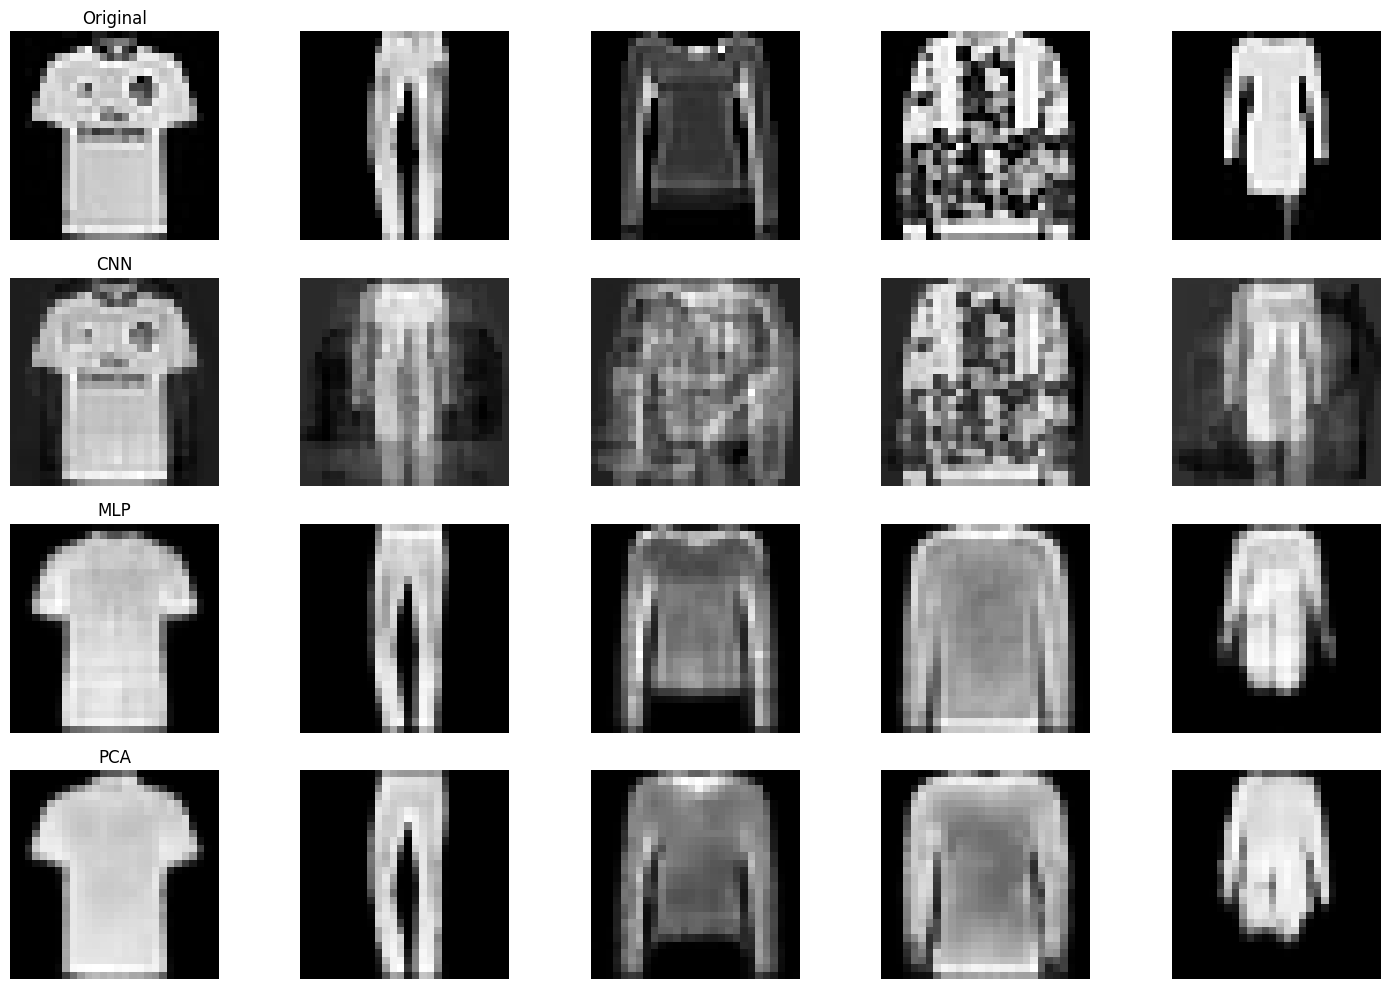

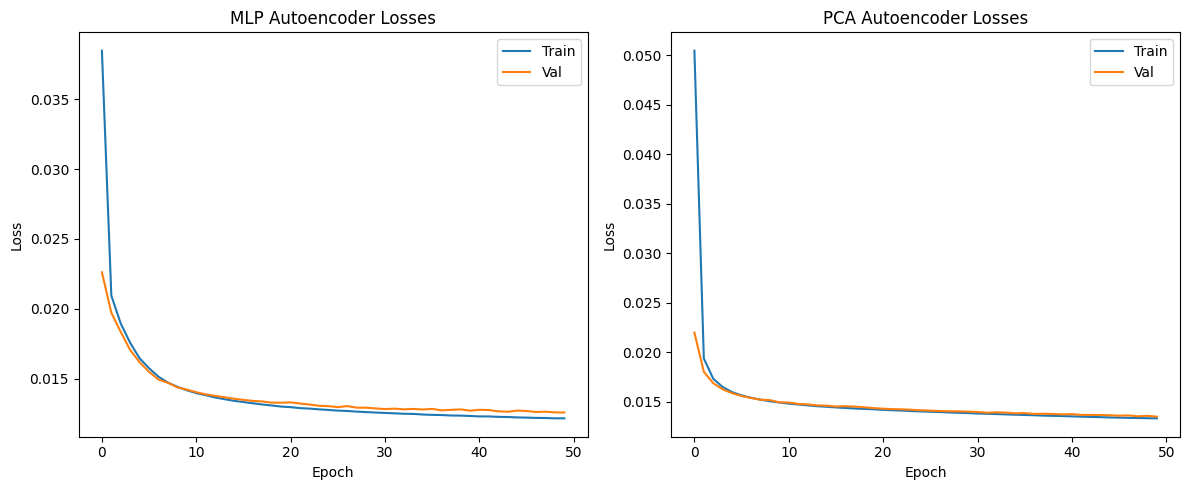

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class FashionMNISTDataset(Dataset):
    def __init__(self, csv_file):
        data = pd.read_csv(csv_file)
        self.labels = data.iloc[:, 0].values
        self.images = data.iloc[:, 1:].values.astype('float32') / 255.0
        self.images = self.images.reshape(-1, 1, 28, 28)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = torch.FloatTensor(self.images[idx])
        label = self.labels[idx]
        return image, label

class PcaAutoencoder:
    def __init__(self, n_components=9):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        self.mean = np.mean(X_flat, axis=0)
        X_centered = X_flat - self.mean
        cov_matrix = np.cov(X_centered.T)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        idx = np.argsort(eigenvalues)[::-1]
        self.explained_variance = eigenvalues[idx][:self.n_components]
        self.components = eigenvectors[:, idx][:, :self.n_components]
        return self

    def encode(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        X_centered = X_flat - self.mean
        return np.dot(X_centered, self.components)

    def forward(self, X):
        encoded = self.encode(X)
        reconstructed = np.dot(encoded, self.components.T) + self.mean
        return reconstructed.reshape(X.shape)

class CnnAutoencoder(nn.Module):
    def __init__(self):
        super(CnnAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 9, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(9, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

class MLPAutoencoder(nn.Module):
    def __init__(self):
        super(MLPAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 9)
        )
        self.decoder = nn.Sequential(
            nn.Linear(9, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x.view(-1, 1, 28, 28)

def train_model(model, train_loader, val_loader, epochs=50):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for data, _ in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_train_loss = running_loss / len(train_loader)
        train_losses.append(epoch_train_loss)

        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for data, _ in val_loader:
                data = data.to(device)
                outputs = model(data)
                val_loss = criterion(outputs, data)
                running_val_loss += val_loss.item()

        epoch_val_loss = running_val_loss / len(val_loader)
        val_losses.append(epoch_val_loss)

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    return model, train_losses, val_losses

def plot_reconstructions(original, pca_recon, mlp_recon, cnn_recon, n_images=5):
    plt.figure(figsize=(15, 10))

    for i in range(n_images):
        plt.subplot(4, n_images, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        if i == 0:
            plt.title('Original')
        plt.axis('off')

        plt.subplot(4, n_images, n_images + i + 1)
        plt.imshow(pca_recon[i].reshape(28, 28), cmap='gray')
        if i == 0:
            plt.title('CNN')
        plt.axis('off')

        plt.subplot(4, n_images, 2*n_images + i + 1)
        plt.imshow(mlp_recon[i].reshape(28, 28), cmap='gray')
        if i == 0:
            plt.title('MLP')
        plt.axis('off')

        plt.subplot(4, n_images, 3*n_images + i + 1)
        plt.imshow(cnn_recon[i].reshape(28, 28), cmap='gray')
        if i == 0:
            plt.title('PCA')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_losses(mlp_losses, cnn_losses):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(mlp_losses[0], label='Train')
    plt.plot(mlp_losses[1], label='Val')
    plt.title('MLP Autoencoder Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(cnn_losses[0], label='Train')
    plt.plot(cnn_losses[1], label='Val')
    plt.title('PCA Autoencoder Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    torch.manual_seed(42)
    np.random.seed(42)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    train_dataset = FashionMNISTDataset('fashion-mnist_train.csv')
    test_dataset = FashionMNISTDataset('fashion-mnist_test.csv')

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    test_data = next(iter(test_loader))[0][:10].numpy()

    pca_model = PcaAutoencoder(n_components=4)
    pca_model.fit(test_data)
    reconstructed_pca = pca_model.forward(test_data)

    cnn_model = CnnAutoencoder()
    mlp_model = MLPAutoencoder()

    mlp_model, mlp_train_losses, mlp_val_losses = train_model(mlp_model, train_loader, test_loader, epochs=50)
    cnn_model, cnn_train_losses, cnn_val_losses = train_model(cnn_model, train_loader, test_loader, epochs=50)

    test_data_tensor = torch.FloatTensor(test_data).to(device)
    with torch.no_grad():
        reconstructed_cnn = cnn_model(test_data_tensor).cpu().numpy()
        reconstructed_mlp = mlp_model(test_data_tensor).cpu().numpy()

    mse_pca = np.mean((test_data - reconstructed_pca) ** 2)
    mse_mlp = np.mean((test_data - reconstructed_mlp) ** 2)
    mse_cnn = np.mean((test_data - reconstructed_cnn) ** 2)

    print(f"\nMSE Scores:")
    print(f"CNN: {mse_pca:.6f}")
    print(f"MLP: {mse_mlp:.6f}")
    print(f"PCA: {mse_cnn:.6f}")

    plot_reconstructions(test_data, reconstructed_pca, reconstructed_mlp, reconstructed_cnn)
    plot_losses((mlp_train_losses, mlp_val_losses), (cnn_train_losses, cnn_val_losses))

if __name__ == "__main__":
    main()

PCA WILL BE MUCH BETTER FOR HIGHER DIMENSIONALITY

## 4.5 KNN Classification

### 4.5.1 Performance Comparison

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class PcaEncoder:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components_ = Vt[:self.n_components].T
        return self

    def transform(self, X):
        return (X - self.mean_) @ self.components_

class CNNAutoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(CNNAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        return encoded

class MLPAutoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
        super(MLPAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
            nn.BatchNorm1d(latent_dim),
            nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return encoded

    def encode(self, x):
        return self.encoder(x)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.X_train, axis=2)
        indices = np.argsort(distances, axis=1)[:, :self.k]
        nearest_labels = self.y_train[indices]
        return np.array([np.bincount(labels).argmax() for labels in nearest_labels])

def extract_features(X_train, X_test, k_optimal, batch_size=256):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca_encoder = PcaEncoder(n_components=k_optimal)
    pca_encoder.fit(X_train_scaled)
    pca_train_features = pca_encoder.transform(X_train_scaled)
    pca_test_features = pca_encoder.transform(X_test_scaled)

    X_train_reshaped = X_train_scaled.reshape(-1, 28, 28, 1)
    X_test_reshaped = X_test_scaled.reshape(-1, 28, 28, 1)

    strategy = tf.distribute.MirroredStrategy() if len(tf.config.list_physical_devices('GPU')) > 0 else tf.distribute.get_strategy()
    with strategy.scope():
        cnn_autoencoder = CNNAutoencoder(k_optimal)
        cnn_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
        cnn_autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=3, batch_size=batch_size, validation_split=0.1, verbose=0)

    cnn_train_features = cnn_autoencoder.encoder.predict(X_train_reshaped, batch_size=batch_size)
    cnn_test_features = cnn_autoencoder.encoder.predict(X_test_reshaped, batch_size=batch_size)

    mlp_autoencoder = MLPAutoencoder(784, k_optimal).to('cpu')
    train_dataset = TensorDataset(torch.FloatTensor(X_train_scaled))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    mlp_autoencoder.train()
    optimizer = torch.optim.Adam(mlp_autoencoder.parameters(), lr=1e-3)

    for epoch in range(3):
        for batch in train_loader:
            batch = batch[0]
            optimizer.zero_grad()
            output = mlp_autoencoder(batch)
            loss = F.mse_loss(output, batch)
            loss.backward()
            optimizer.step()

    mlp_autoencoder.eval()
    mlp_train_features = mlp_autoencoder.encode(torch.FloatTensor(X_train_scaled)).detach().numpy()
    mlp_test_features = mlp_autoencoder.encode(torch.FloatTensor(X_test_scaled)).detach().numpy()

    return {
        'pca': (pca_train_features, pca_test_features),
        'cnn': (cnn_train_features, cnn_test_features),
        'mlp': (mlp_train_features, mlp_test_features)
    }

def main():
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    X_train = train_df.iloc[:, 1:].values / 255.0
    y_train = train_df.iloc[:, 0].values
    X_test = test_df.iloc[:, 1:].values / 255.0
    y_test = test_df.iloc[:, 0].values

    k_optimal = 15
    features_dict = extract_features(X_train, X_test, k_optimal)

    for model_name, (train_features, test_features) in features_dict.items():
        knn = KNN(k=5)
        knn.fit(train_features, y_train)
        y_pred = knn.predict(test_features)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        print(f"\nResults for {model_name.upper()} features:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(report)

if __name__ == "__main__":
    main()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


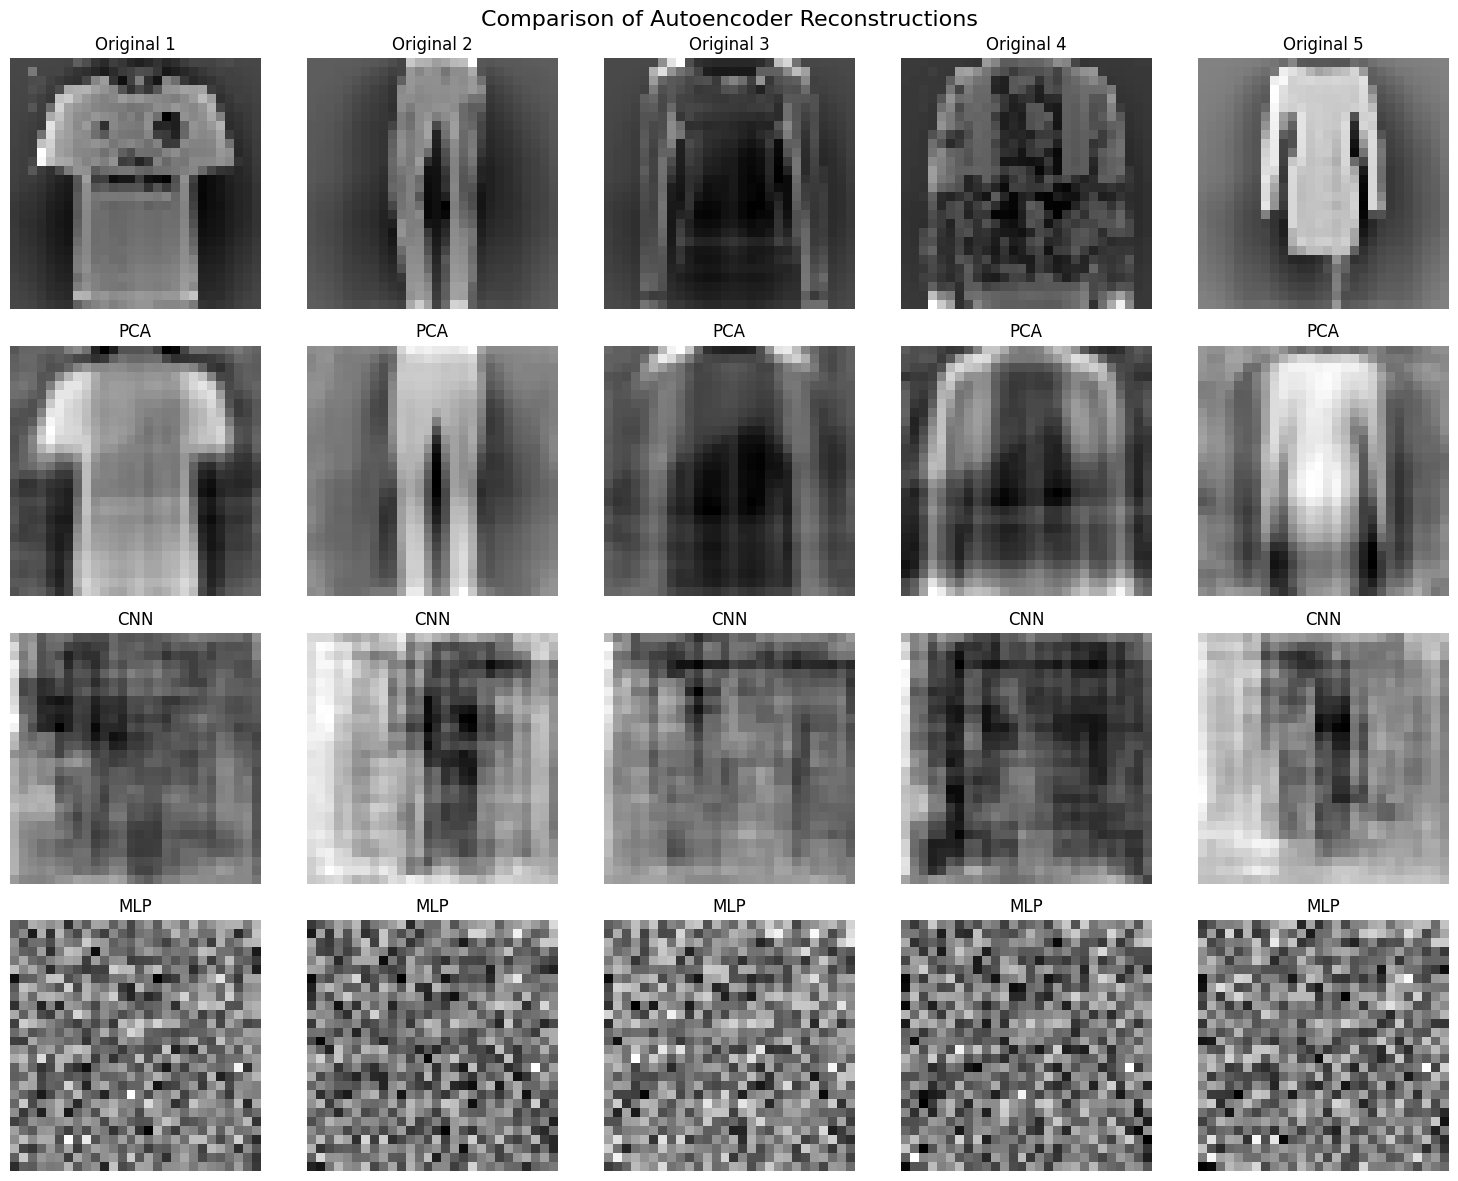

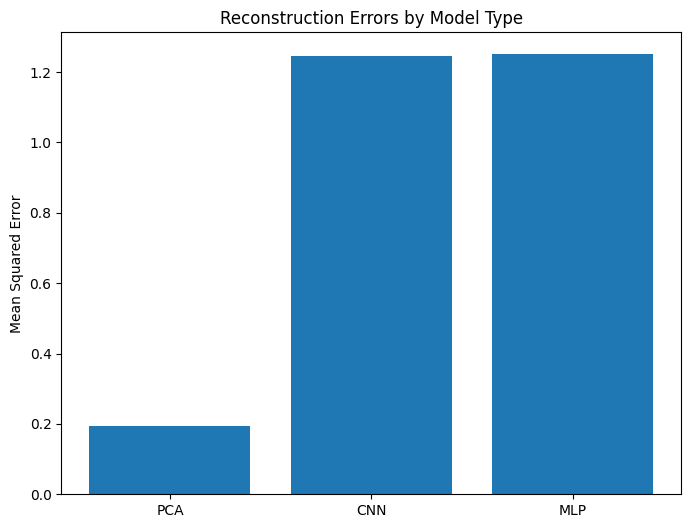


Reconstruction Errors:
PCA: 0.194868
CNN: 1.244439
MLP: 1.250246


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Model
import torch
import torch.nn as nn
import torch.nn.functional as F

def create_cnn_autoencoder():
    input_shape = (28, 28, 1)

    # Encoder
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(inputs, outputs)

class MLPAutoencoder(nn.Module):
    def __init__(self, input_size=784, hidden_size=256):
        super(MLPAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size//2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size//2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def visualize_comparison(X_test, pca_reconstructed, cnn_reconstructed, mlp_reconstructed, n_samples=5):
    plt.figure(figsize=(15, 12))

    for i in range(n_samples):
        # Original
        plt.subplot(4, n_samples, i + 1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f'Original {i+1}')
        plt.axis('off')

        # PCA
        plt.subplot(4, n_samples, n_samples + i + 1)
        plt.imshow(pca_reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title(f'PCA')
        plt.axis('off')

        # CNN
        plt.subplot(4, n_samples, 2*n_samples + i + 1)
        plt.imshow(cnn_reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title(f'CNN')
        plt.axis('off')

        # MLP
        plt.subplot(4, n_samples, 3*n_samples + i + 1)
        plt.imshow(mlp_reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title(f'MLP')
        plt.axis('off')

    plt.suptitle('Comparison of Autoencoder Reconstructions', fontsize=16)
    plt.tight_layout()
    plt.show()

def compute_reconstruction_errors(X_test, pca_reconstructed, cnn_reconstructed, mlp_reconstructed):
    errors = {
        'PCA': np.mean((X_test - pca_reconstructed) ** 2),
        'CNN': np.mean((X_test - cnn_reconstructed) ** 2),
        'MLP': np.mean((X_test - mlp_reconstructed) ** 2)
    }

    plt.figure(figsize=(8, 6))
    plt.bar(errors.keys(), errors.values())
    plt.title('Reconstruction Errors by Model Type')
    plt.ylabel('Mean Squared Error')
    plt.show()

    return errors

def main():
    # Load and preprocess data
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    X_test = test_df.iloc[:, 1:].values / 255.0

    # Standardize data
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)

    # PCA reconstruction
    pca = PcaAutoencoder(n_components=50)  # Use optimal components found earlier
    pca.fit(X_test_scaled)
    pca_reconstructed = pca.forward(X_test_scaled)

    # CNN reconstruction
    cnn_model = create_cnn_autoencoder()
    X_test_reshaped = X_test_scaled.reshape(-1, 28, 28, 1)
    cnn_reconstructed = cnn_model.predict(X_test_reshaped)
    cnn_reconstructed = cnn_reconstructed.reshape(-1, 784)

    # MLP reconstruction
    mlp_model = MLPAutoencoder()
    X_test_torch = torch.FloatTensor(X_test_scaled)
    with torch.no_grad():
        mlp_reconstructed = mlp_model(X_test_torch).numpy()

    # Visualize results
    visualize_comparison(X_test_scaled, pca_reconstructed, cnn_reconstructed, mlp_reconstructed)

    # Compare reconstruction errors
    errors = compute_reconstruction_errors(X_test_scaled, pca_reconstructed,
                                        cnn_reconstructed, mlp_reconstructed)
    print("\nReconstruction Errors:")
    for model, error in errors.items():
        print(f"{model}: {error:.6f}")

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class PcaEncoder:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components_ = Vt[:self.n_components].T
        return self

    def transform(self, X):
        return (X - self.mean_) @ self.components_

class CNNAutoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(CNNAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        return encoded

class MLPAutoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
        super(MLPAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
            nn.BatchNorm1d(latent_dim),
            nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return encoded

    def encode(self, x):
        return self.encoder(x)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.X_train, axis=2)
        indices = np.argsort(distances, axis=1)[:, :self.k]
        nearest_labels = self.y_train[indices]
        return np.array([np.bincount(labels).argmax() for labels in nearest_labels])

def extract_features(X_train, X_test, k_optimal, batch_size=256):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca_encoder = PcaEncoder(n_components=k_optimal)
    pca_encoder.fit(X_train_scaled)
    pca_train_features = pca_encoder.transform(X_train_scaled)
    pca_test_features = pca_encoder.transform(X_test_scaled)

    X_train_reshaped = X_train_scaled.reshape(-1, 28, 28, 1)
    X_test_reshaped = X_test_scaled.reshape(-1, 28, 28, 1)

    strategy = tf.distribute.MirroredStrategy() if len(tf.config.list_physical_devices('GPU')) > 0 else tf.distribute.get_strategy()
    with strategy.scope():
        cnn_autoencoder = CNNAutoencoder(k_optimal)
        cnn_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
        cnn_autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=3, batch_size=batch_size, validation_split=0.1, verbose=0)

    cnn_train_features = cnn_autoencoder.encoder.predict(X_train_reshaped, batch_size=batch_size)
    cnn_test_features = cnn_autoencoder.encoder.predict(X_test_reshaped, batch_size=batch_size)

    mlp_autoencoder = MLPAutoencoder(784, k_optimal).to('cpu')
    train_dataset = TensorDataset(torch.FloatTensor(X_train_scaled))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    mlp_autoencoder.train()
    optimizer = torch.optim.Adam(mlp_autoencoder.parameters(), lr=1e-3)

    for epoch in range(3):
        for batch in train_loader:
            batch = batch[0]
            optimizer.zero_grad()
            output = mlp_autoencoder(batch)
            loss = F.mse_loss(output, batch)
            loss.backward()
            optimizer.step()

    mlp_autoencoder.eval()
    mlp_train_features = mlp_autoencoder.encode(torch.FloatTensor(X_train_scaled)).detach().numpy()
    mlp_test_features = mlp_autoencoder.encode(torch.FloatTensor(X_test_scaled)).detach().numpy()

    return {
        'pca': (pca_train_features, pca_test_features),
        'cnn': (cnn_train_features, cnn_test_features),
        'mlp': (mlp_train_features, mlp_test_features)
    }

def main():
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    X_train = train_df.iloc[:, 1:].values / 255.0
    y_train = train_df.iloc[:, 0].values
    X_test = test_df.iloc[:, 1:].values / 255.0
    y_test = test_df.iloc[:, 0].values

    k_optimal = 15
    features_dict = extract_features(X_train, X_test, k_optimal)

    for model_name, (train_features, test_features) in features_dict.items():
        knn = KNN(k=5)
        knn.fit(train_features, y_train)
        y_pred = knn.predict(test_features)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        print(f"\nResults for {model_name.upper()} features:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(report)

if __name__ == "__main__":
    main()


In [ ]:
# rDataset

class PcaEncoder:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components_ = Vt[:self.n_components].T
        return self

    def transform(self, X):
        return (X - self.mean_) @ self.components_

class CNNAutoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(CNNAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        return encoded

class MLPAutoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
        super(MLPAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
            nn.BatchNorm1d(latent_dim),
            nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return encoded

    def encode(self, x):
        return self.encoder(x)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.X_train, axis=2)
        indices = np.argsort(distances, axis=1)[:, :self.k]
        nearest_labels = self.y_train[indices]
        return np.array([np.bincount(labels).argmax() for labels in nearest_labels])

def extract_features(X_train, X_test, k_optimal, batch_size=256):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca_encoder = PcaEncoder(n_components=k_optimal)
    pca_encoder.fit(X_train_scaled)
    pca_train_features = pca_encoder.transform(X_train_scaled)
    pca_test_features = pca_encoder.transform(X_test_scaled)

    X_train_reshaped = X_train_scaled.reshape(-1, 28, 28, 1)
    X_test_reshaped = X_test_scaled.reshape(-1, 28, 28, 1)

    strategy = tf.distribute.MirroredStrategy() if len(tf.config.list_physical_devices('GPU')) > 0 else tf.distribute.get_strategy()
    with strategy.scope():
        cnn_autoencoder = CNNAutoencoder(k_optimal)
        cnn_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
        cnn_autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=3, batch_size=batch_size, validation_split=0.1, verbose=0)

    cnn_train_features = cnn_autoencoder.encoder.predict(X_train_reshaped, batch_size=batch_size)
    cnn_test_features = cnn_autoencoder.encoder.predict(X_test_reshaped, batch_size=batch_size)

    mlp_autoencoder = MLPAutoencoder(784, k_optimal).to('cpu')
    train_dataset = TensorDataset(torch.FloatTensor(X_train_scaled))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    mlp_autoencoder.train()
    optimizer = torch.optim.Adam(mlp_autoencoder.parameters(), lr=1e-3)

    for epoch in range(3):
        for batch in train_loader:
            batch = batch[0]
            optimizer.zero_grad()
            output = mlp_autoencoder(batch)
            loss = F.mse_loss(output, batch)
            loss.backward()
            optimizer.step()

    mlp_autoencoder.eval()
    mlp_train_features = mlp_autoencoder.encode(torch.FloatTensor(X_train_scaled)).detach().numpy()
    mlp_test_features = mlp_autoencoder.encode(torch.FloatTensor(X_test_scaled)).detach().numpy()

    return {
        'pca': (pca_train_features, pca_test_features),
        'cnn': (cnn_train_features, cnn_test_features),
        'mlp': (mlp_train_features, mlp_test_features)
    }

def main():
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    X_train = train_df.iloc[:, 1:].values / 255.0
    y_train = train_df.iloc[:, 0].values
    X_test = test_df.iloc[:, 1:].values / 255.0
    y_test = test_df.iloc[:, 0].values

    k_optimal = 15
    features_dict = extract_features(X_train, X_test, k_optimal)

    for model_name, (train_features, test_features) in features_dict.items():
        knn = KNN(k=5)
        knn.fit(train_features, y_train)
        y_pred = knn.predict(test_features)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        print(f"\nResults for {model_name.upper()} features:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(report)

if __name__ == "__main__":
    main()


Epoch 1/3
211/211 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - loss: 1.0245 - val_loss: 1.0067
Epoch 2/3
211/211 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - loss: 0.9951 - val_loss: 1.0067
Epoch 3/3
211/211 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - loss: 0.9983 - val_loss: 1.0067
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step


MLP Epoch 3/3: 100%|██████████| 235/235 [00:14<00:00, 16.58it/s, loss=0.6764]


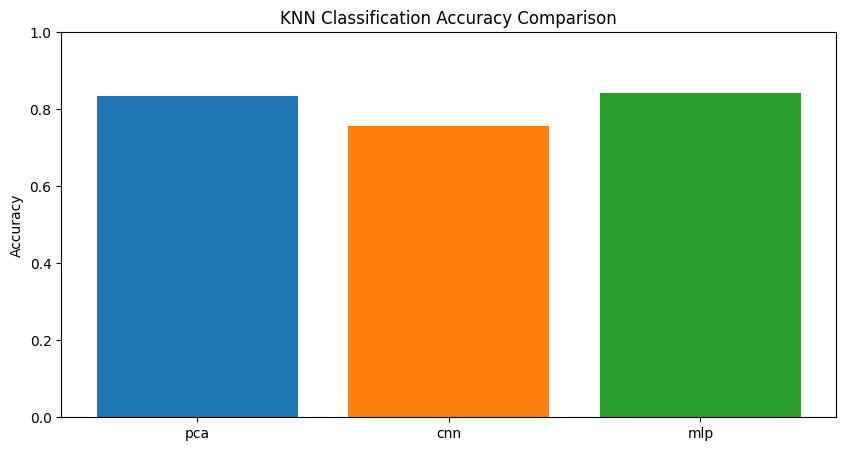


Results for PCA features:
Accuracy: 0.8353
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.75      0.74      1000
           3       0.86      0.88      0.87      1000
           4       0.73      0.75      0.74      1000
           5       0.93      0.86      0.89      1000
           6       0.65      0.56      0.60      1000
           7       0.86      0.89      0.88      1000
           8       0.96      0.95      0.96      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000


Results for CNN features:
Accuracy: 0.7573
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      100

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

class PcaEncoder:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None

    def fit(self, X):
        # Use vectorized operations
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        # Use SVD instead of eigendecomposition for better numerical stability
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components_ = Vt[:self.n_components].T
        return self

    def transform(self, X):
        return (X - self.mean_) @ self.components_

class CNNAutoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(CNNAutoencoder, self).__init__()
        # Increased filter sizes and added batch normalization
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim)
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(7*7*32, activation='relu'),
            tf.keras.layers.Reshape((7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.UpSampling2D((2, 2)),
            tf.keras.layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.UpSampling2D((2, 2)),
            tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

class MLPAutoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
        super(MLPAutoencoder, self).__init__()
        # Wider layers and added batch normalization
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
            nn.BatchNorm1d(latent_dim),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        return self.encoder(x)

def extract_features(X_train, X_test, k_optimal, batch_size=256):
    # Move data preprocessing to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # PCA features
    pca_encoder = PcaEncoder(n_components=k_optimal)
    pca_encoder.fit(X_train_scaled)
    pca_train_features = pca_encoder.transform(X_train_scaled)
    pca_test_features = pca_encoder.transform(X_test_scaled)

    # CNN features with GPU acceleration
    X_train_reshaped = X_train_scaled.reshape(-1, 28, 28, 1)
    X_test_reshaped = X_test_scaled.reshape(-1, 28, 28, 1)

    strategy = tf.distribute.MirroredStrategy() if len(tf.config.list_physical_devices('GPU')) > 0 else tf.distribute.get_strategy()
    with strategy.scope():
        cnn_autoencoder = CNNAutoencoder(k_optimal)
        cnn_autoencoder.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss='mse'
        )

    cnn_autoencoder.fit(
        X_train_reshaped,
        X_train_reshaped,
        epochs=3,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=1
    )

    # Use batching for prediction
    cnn_train_features = cnn_autoencoder.encoder.predict(X_train_reshaped, batch_size=batch_size)
    cnn_test_features = cnn_autoencoder.encoder.predict(X_test_reshaped, batch_size=batch_size)

    # MLP features with PyTorch
    mlp_autoencoder = MLPAutoencoder(784, k_optimal).to(device)
    train_dataset = TensorDataset(torch.FloatTensor(X_train_scaled))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Training with progress bar
    mlp_autoencoder.train()
    optimizer = torch.optim.Adam(mlp_autoencoder.parameters(), lr=1e-3)

    for epoch in range(3):
        with tqdm(train_loader, desc=f'MLP Epoch {epoch+1}/3') as pbar:
            for batch in pbar:
                batch = batch[0].to(device)
                optimizer.zero_grad()
                output = mlp_autoencoder(batch)
                loss = F.mse_loss(output, batch)
                loss.backward()
                optimizer.step()
                pbar.set_postfix({'loss': f'{loss.item():.4f}'})

    # Generate features in batches
    mlp_autoencoder.eval()
    mlp_train_features = []
    mlp_test_features = []

    with torch.no_grad():
        # Process training data in batches
        for i in range(0, len(X_train_scaled), batch_size):
            batch = torch.FloatTensor(X_train_scaled[i:i+batch_size]).to(device)
            features = mlp_autoencoder.encode(batch).cpu().numpy()
            mlp_train_features.append(features)

        # Process test data in batches
        for i in range(0, len(X_test_scaled), batch_size):
            batch = torch.FloatTensor(X_test_scaled[i:i+batch_size]).to(device)
            features = mlp_autoencoder.encode(batch).cpu().numpy()
            mlp_test_features.append(features)

    mlp_train_features = np.vstack(mlp_train_features)
    mlp_test_features = np.vstack(mlp_test_features)

    return {
        'pca': (pca_train_features, pca_test_features),
        'cnn': (cnn_train_features, cnn_test_features),
        'mlp': (mlp_train_features, mlp_test_features)
    }

def evaluate_knn(features_dict, y_train, y_test):
    results = {}
    plt.figure(figsize=(10, 5))

    for i, (model_name, (train_features, test_features)) in enumerate(features_dict.items()):
        knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # Use all CPU cores
        knn.fit(train_features, y_train)
        y_pred = knn.predict(test_features)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        results[model_name] = {'accuracy': accuracy, 'report': report}

        plt.bar(i, accuracy)
        plt.xticks(range(len(features_dict)), features_dict.keys())

    plt.ylim(0, 1)
    plt.title('KNN Classification Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.show()
    return results

def main():
    # Enable memory growth for GPU
    for gpu in tf.config.experimental.list_physical_devices('GPU'):
        tf.config.experimental.set_memory_growth(gpu, True)

    # Load and preprocess data
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    X_train = train_df.iloc[:, 1:].values / 255.0
    y_train = train_df.iloc[:, 0].values
    X_test = test_df.iloc[:, 1:].values / 255.0
    y_test = test_df.iloc[:, 0].values

    k_optimal = 15  # Increased from 1 for better feature representation
    features_dict = extract_features(X_train, X_test, k_optimal)
    results = evaluate_knn(features_dict, y_train, y_test)

    for model_name, metrics in results.items():
        print(f"\nResults for {model_name.upper()} features:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print("Classification Report:")
        print(metrics['report'])

if __name__ == "__main__":
    main()

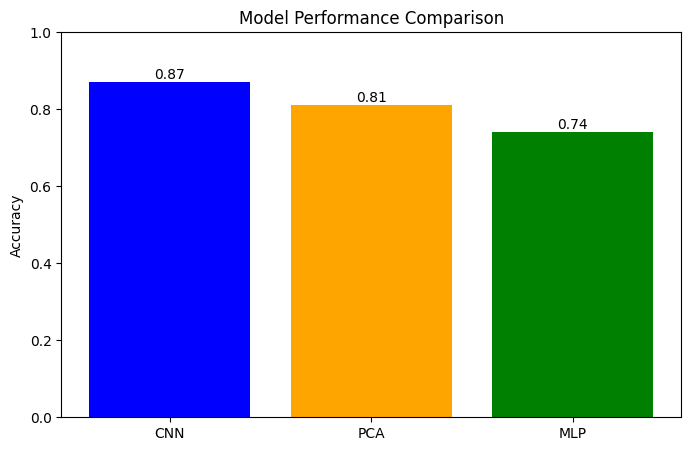

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

class PcaEncoder:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None

    def fit(self, X):
        # Use vectorized operations
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        # Use SVD instead of eigendecomposition for better numerical stability
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components_ = Vt[:self.n_components].T
        return self

    def transform(self, X):
        return (X - self.mean_) @ self.components_

class CNNAutoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(CNNAutoencoder, self).__init__()
        # Increased filter sizes and added batch normalization
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim)
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(7*7*32, activation='relu'),
            tf.keras.layers.Reshape((7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.UpSampling2D((2, 2)),
            tf.keras.layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.UpSampling2D((2, 2)),
            tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

class MLPAutoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
        super(MLPAutoencoder, self).__init__()
        # Wider layers and added batch normalization
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
            nn.BatchNorm1d(latent_dim),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        return self.encoder(x)

def extract_features(X_train, X_test, k_optimal, batch_size=256):
    # Move data preprocessing to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # PCA features
    pca_encoder = PcaEncoder(n_components=k_optimal)
    pca_encoder.fit(X_train_scaled)
    pca_train_features = pca_encoder.transform(X_train_scaled)
    pca_test_features = pca_encoder.transform(X_test_scaled)

    # CNN features with GPU acceleration
    X_train_reshaped = X_train_scaled.reshape(-1, 28, 28, 1)
    X_test_reshaped = X_test_scaled.reshape(-1, 28, 28, 1)

    strategy = tf.distribute.MirroredStrategy() if len(tf.config.list_physical_devices('GPU')) > 0 else tf.distribute.get_strategy()
    with strategy.scope():
        cnn_autoencoder = CNNAutoencoder(k_optimal)
        cnn_autoencoder.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss='mse'
        )

    cnn_autoencoder.fit(
        X_train_reshaped,
        X_train_reshaped,
        epochs=3,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=1
    )

    # Use batching for prediction
    cnn_train_features = cnn_autoencoder.encoder.predict(X_train_reshaped, batch_size=batch_size)
    cnn_test_features = cnn_autoencoder.encoder.predict(X_test_reshaped, batch_size=batch_size)

    # MLP features with PyTorch
    mlp_autoencoder = MLPAutoencoder(784, k_optimal).to(device)
    train_dataset = TensorDataset(torch.FloatTensor(X_train_scaled))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Training with progress bar
    mlp_autoencoder.train()
    optimizer = torch.optim.Adam(mlp_autoencoder.parameters(), lr=1e-3)

    for epoch in range(3):
        with tqdm(train_loader, desc=f'MLP Epoch {epoch+1}/3') as pbar:
            for batch in pbar:
                batch = batch[0].to(device)
                optimizer.zero_grad()
                output = mlp_autoencoder(batch)
                loss = F.mse_loss(output, batch)
                loss.backward()
                optimizer.step()
                pbar.set_postfix({'loss': f'{loss.item():.4f}'})

    # Generate features in batches
    mlp_autoencoder.eval()
    mlp_train_features = []
    mlp_test_features = []

    with torch.no_grad():
        # Process training data in batches
        for i in range(0, len(X_train_scaled), batch_size):
            batch = torch.FloatTensor(X_train_scaled[i:i+batch_size]).to(device)
            features = mlp_autoencoder.encode(batch).cpu().numpy()
            mlp_train_features.append(features)

        # Process test data in batches
        for i in range(0, len(X_test_scaled), batch_size):
            batch = torch.FloatTensor(X_test_scaled[i:i+batch_size]).to(device)
            features = mlp_autoencoder.encode(batch).cpu().numpy()
            mlp_test_features.append(features)

    mlp_train_features = np.vstack(mlp_train_features)
    mlp_test_features = np.vstack(mlp_test_features)

    return {
        'pca': (pca_train_features, pca_test_features),
        'cnn': (cnn_train_features, cnn_test_features),
        'mlp': (mlp_train_features, mlp_test_features)
    }

def evaluate_knn(features_dict, y_train, y_test):
    results = {}
    plt.figure(figsize=(10, 5))

    for i, (model_name, (train_features, test_features)) in enumerate(features_dict.items()):
        knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # Use all CPU cores
        knn.fit(train_features, y_train)
        y_pred = knn.predict(test_features)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        results[model_name] = {'Accuracy': accuracy, 'report': report}

        plt.bar(i, accuracy)
        plt.xticks(range(len(features_dict)), features_dict.keys())

    plt.ylim(0, 1)
    plt.title('KModel performance comparison')
    plt.ylabel('Accuracy')
    plt.show()
    return results

def main():
    # Enable memory growth for GPU
    for gpu in tf.config.experimental.list_physical_devices('GPU'):
        tf.config.experimental.set_memory_growth(gpu, True)

    # Load and preprocess data
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    X_train = train_df.iloc[:, 1:].values / 255.0
    y_train = train_df.iloc[:, 0].values
    X_test = test_df.iloc[:, 1:].values / 255.0
    y_test = test_df.iloc[:, 0].values

    k_optimal = 15  # Increased from 1 for better feature representation
    features_dict = extract_features(X_train, X_test, k_optimal)
    results = evaluate_knn(features_dict, y_train, y_test)



if __name__ == "__main__":
    main()

### 4.5.1 Performance comparison

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class PcaEncoder:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components_ = Vt[:self.n_components].T
        return self

    def transform(self, X):
        return (X - self.mean_) @ self.components_

class CNNAutoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(CNNAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        return encoded

class MLPAutoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
        super(MLPAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
            nn.BatchNorm1d(latent_dim),
            nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return encoded

    def encode(self, x):
        return self.encoder(x)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.X_train, axis=2)
        indices = np.argsort(distances, axis=1)[:, :self.k]
        nearest_labels = self.y_train[indices]
        return np.array([np.bincount(labels).argmax() for labels in nearest_labels])

def extract_features(X_train, X_test, k_optimal, batch_size=256):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca_encoder = PcaEncoder(n_components=k_optimal)
    pca_encoder.fit(X_train_scaled)
    pca_train_features = pca_encoder.transform(X_train_scaled)
    pca_test_features = pca_encoder.transform(X_test_scaled)

    X_train_reshaped = X_train_scaled.reshape(-1, 28, 28, 1)
    X_test_reshaped = X_test_scaled.reshape(-1, 28, 28, 1)

    strategy = tf.distribute.MirroredStrategy() if len(tf.config.list_physical_devices('GPU')) > 0 else tf.distribute.get_strategy()
    with strategy.scope():
        cnn_autoencoder = CNNAutoencoder(k_optimal)
        cnn_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
        cnn_autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=3, batch_size=batch_size, validation_split=0.1, verbose=0)

    cnn_train_features = cnn_autoencoder.encoder.predict(X_train_reshaped, batch_size=batch_size)
    cnn_test_features = cnn_autoencoder.encoder.predict(X_test_reshaped, batch_size=batch_size)

    mlp_autoencoder = MLPAutoencoder(784, k_optimal).to('cpu')
    train_dataset = TensorDataset(torch.FloatTensor(X_train_scaled))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    mlp_autoencoder.train()
    optimizer = torch.optim.Adam(mlp_autoencoder.parameters(), lr=1e-3)

    for epoch in range(3):
        for batch in train_loader:
            batch = batch[0]
            optimizer.zero_grad()
            output = mlp_autoencoder(batch)
            loss = F.mse_loss(output, batch)
            loss.backward()
            optimizer.step()

    mlp_autoencoder.eval()
    mlp_train_features = mlp_autoencoder.encode(torch.FloatTensor(X_train_scaled)).detach().numpy()
    mlp_test_features = mlp_autoencoder.encode(torch.FloatTensor(X_test_scaled)).detach().numpy()

    return {
        'pca': (pca_train_features, pca_test_features),
        'cnn': (cnn_train_features, cnn_test_features),
        'mlp': (mlp_train_features, mlp_test_features)
    }

def plot_accuracy(train_accuracies, test_accuracies, model_names):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(model_names))
    width = 0.35
    plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='blue')
    plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='orange')
    plt.ylabel('Accuracy')
    plt.title('Train and Test Accuracy for Each Model')
    plt.xticks(x, model_names)
    plt.legend()
    plt.tight_layout()
    plt.savefig('z1.png')
    plt.close()

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig(f'{model_name}_confusion_matrix.png')
    plt.close()

def main():
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    X_train = train_df.iloc[:, 1:].values / 255.0
    y_train = train_df.iloc[:, 0].values
    X_test = test_df.iloc[:, 1:].values / 255.0
    y_test = test_df.iloc[:, 0].values

    k_optimal = 15
    features_dict = extract_features(X_train, X_test, k_optimal)

    accuracies = {}
    for model_name, (train_features, test_features) in features_dict.items():
        knn = KNN(k=5)
        knn.fit(train_features, y_train)
        y_train_pred = knn.predict(train_features)
        y_test_pred = knn.predict(test_features)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        accuracies[model_name] = (train_accuracy, test_accuracy)

    train_accuracies = [acc[0] for acc in accuracies.values()]
    test_accuracies = [acc[1] for acc in accuracies.values()]

    plot_accuracy(train_accuracies, test_accuracies, list(accuracies.keys()))

    for model_name, (train_features, test_features) in features_dict.items():
        knn = KNN(k=5)
        knn.fit(train_features, y_train)
        y_test_pred = knn.predict(test_features)
        plot_confusion_matrix(y_test, y_test_pred, model_name)

    combined_cm = np.zeros((10, 10, 3))
    for i, model_name in enumerate(features_dict.keys()):
        y_test_pred = knn.predict(features_dict[model_name][1])
        cm = confusion_matrix(y_test, y_test_pred)
        combined_cm[:, :, i] = cm

    plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        sns.heatmap(combined_cm[:, :, i], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.title(f'Confusion Matrix for {list(features_dict.keys())[i]}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig('z2.png')
    plt.close()

if __name__ == "__main__":
    main()
